# **Proyecto de Machine Learning con Python**
El objetivo de este proyecto es generar un modelo de Machine Learning que apoye la toma de decisiones sobre el lugar más adecuado para la apertura de nuevas tiendas de venta al detalle, en una región geográfica específica, haciendo una predicción del desempeño de esta nueva sucursal.

El modelo hace base en un conjunto de variables geográficas y sociodemográficas de los diferentes sitios que son candidatos para la apertura. Con estas variables como entrada, se desea que el modelo pueda predecir la mejor ubicación para abrir una nueva tienda, en la que se maximice el desempeño; es decir, donde el margen de la venta neta sea mayor.

# **Integrantes**
- Del Muro Bracho, Rodrigo
- Franco Meléndez, Gerardo
- Macías Díaz, Miguel Angel
- Mayén Vázquez, Roberto Carlo
- Romero Arellano, Fernando	

# **Regresión Lineal y Polinomial**

In [ ]:
# Conecta al repositorio de Google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carga librerias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
# Asigna directorio de trabajo y dataset
directory ="/content/drive/MyDrive/Proyecto F3M2 - Machine Learning/Data/"
file = 'DataSet Ventas completo 29ABR23.csv'

In [ ]:
# Carga el dataset
df = pd.read_csv(directory+file, header=0)
df.head()

In [ ]:
# Obtiene el numero de registro y numero de variables (columnas)
df.shape 

(139987, 32)

## LIMPIEZA DE DATOS

In [ ]:
# Verificar cuantos valores diferentes tienen las variables
result = df.apply(lambda x: x.value_counts(dropna=True, sort=True)).count()
print('Variable              Num. de valores diferentes')
result

Variable              Num. de valores diferentes


Id_Tienda                         329
Dia                               455
Unidades_Devueltas                594
Monto_Devolucion                38774
Monto_Descuento                112231
Unidades_Venta_Neta             15548
Monto_Venta_Neta               139153
Monto_Costo_Venta              139970
Monto_Margen_Venta             139984
Porcentaje_Margen              139929
Descripcion_Tienda                329
Id_Tipo_Tienda                      1
Descripcion_Tipo_Tienda             1
Id_Zona_Geografica                  7
Descripcion_Zona_Geografica         7
Id_Formato_Tienda                   7
Descripcion_Formato_Tienda          7
Fecha_Apertura                      1
Num_PisoVentaM2                    97
Id_Estado                           1
Desc_Estado                         1
Id_Ciudad                          11
Descripcion_Ciudad                 11
Id_Tipo_Calle                       7
Descricpion_Tipo_Calle              7
CP                                113
Asentamiento

**Se observa que las variables que tienen un solo valor en sus registros son:  Id_Tipo_Tienda,  Descripcion_Tipo_Tienda,  Fecha_Apertura,  Id_Estado,  Desc_Estado, por lo que no son necesarias.**


In [ ]:
# Elimina las variables que tienen un solo valor ( = 1 ) en todos sus registros
df = df.drop(['Id_Tipo_Tienda', 'Descripcion_Tipo_Tienda', 'Fecha_Apertura', 'Id_Estado', 'Desc_Estado'], axis=1)

In [ ]:
df.shape 

(139987, 27)

In [ ]:
# ????????????Identifica las variables que tienen un solo valor en sus registros  (Por verificar)  ??????????????
#un_valor = []
#i = 0
#print(i)
#for column in df.columns:
#  if  np.unique(df.columns.values[i]) == 1:
#      un_valor.append(column)
#      print("Variable:", df.columns.values[i],"  Num. de valores: ",len(df[column].unique()))
#  i= i +1 
#un_valor 

In [ ]:
# Identificar si existen variables con valores NaN
df.isna().sum(axis=0)

Id_Tienda                      0
Dia                            0
Unidades_Devueltas             0
Monto_Devolucion               0
Monto_Descuento                0
Unidades_Venta_Neta            0
Monto_Venta_Neta               0
Monto_Costo_Venta              0
Monto_Margen_Venta             0
Porcentaje_Margen              0
Descripcion_Tienda             0
Id_Zona_Geografica             0
Descripcion_Zona_Geografica    0
Id_Formato_Tienda              0
Descripcion_Formato_Tienda     0
Num_PisoVentaM2                0
Id_Ciudad                      0
Descripcion_Ciudad             0
Id_Tipo_Calle                  0
Descricpion_Tipo_Calle         0
CP                             0
Asentamiento                   0
Latitud                        0
Longitud                       0
Comercios_por_10000            0
%_Ocupacion_12_o_mas           0
%_Falta_acceso_alimentacion    0
dtype: int64

**No se encontraron valores NaN**

In [ ]:
# Conviertir la variable Asentamiento en variable categórica
df['Asentamiento'] = df['Asentamiento'].astype('category')
df['Id_Asentamiento'] = df['Asentamiento'].cat.codes.astype('int64')
df = df.drop('Asentamiento', axis=1)

In [ ]:
# Identifica las variables tipo Object
tipo_object = []
i = 0
for column in df.columns:
  if df[column].dtype == object:
      tipo_object.append(column)
      print("Variable tipo Object:", df.columns.values[i],"      Num. de valores diferentes: ",len(df[column].unique()))
  i= i +1 
print("Total de variables tipo Object:",len(tipo_object))

Variable tipo Object: Descripcion_Tienda       Num. de valores diferentes:  329
Variable tipo Object: Descripcion_Zona_Geografica       Num. de valores diferentes:  7
Variable tipo Object: Descripcion_Formato_Tienda       Num. de valores diferentes:  7
Variable tipo Object: Descripcion_Ciudad       Num. de valores diferentes:  11
Variable tipo Object: Descricpion_Tipo_Calle       Num. de valores diferentes:  7
Total de variables tipo Object: 5


In [ ]:
# Eliminar variables tipo Object, que ademas se encuentra repetidas con las variables Id_xxxxxxxx
df = df.drop(columns=tipo_object)

In [ ]:
# Elimina variables no necesarias
df = df.drop(columns=['Latitud','Longitud','Dia'])

In [ ]:
df.max()

Id_Tienda                      4.170000e+02
Unidades_Devueltas             1.698100e+04
Monto_Devolucion               6.551994e+04
Monto_Descuento                7.222540e+04
Unidades_Venta_Neta            5.750400e+05
Monto_Venta_Neta               1.340000e+07
Monto_Costo_Venta              1.010000e+07
Monto_Margen_Venta             3.235902e+06
Porcentaje_Margen              1.809399e+01
Id_Zona_Geografica             3.000000e+02
Id_Formato_Tienda              1.400000e+02
Num_PisoVentaM2                9.340000e+02
Id_Ciudad                      1.546000e+03
Id_Tipo_Calle                  1.800000e+01
CP                             3.290000e+04
Comercios_por_10000            9.355000e+01
%_Ocupacion_12_o_mas           4.656000e-01
%_Falta_acceso_alimentacion    1.286484e-01
Id_Asentamiento                1.580000e+02
dtype: float64

## ANÁLISIS EXPLORATORIO

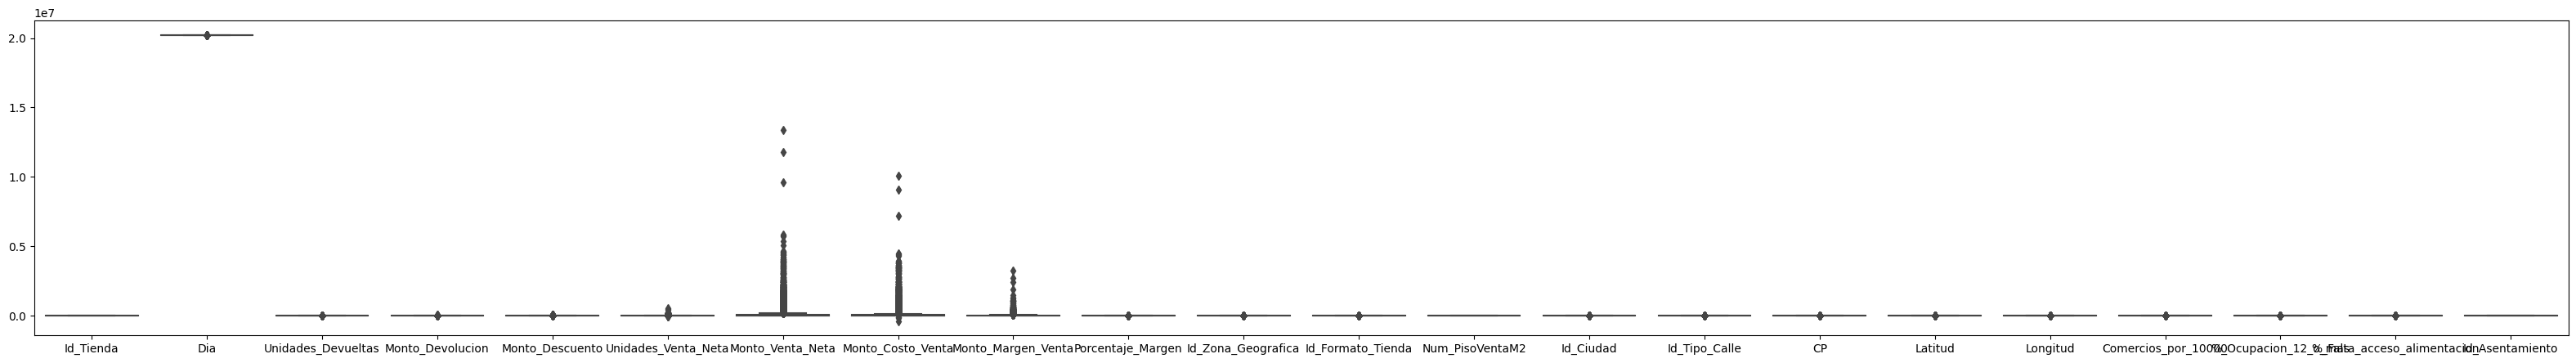

In [ ]:
# Grafica boxplot para observar datos atípicos en cada una de las variables numericas
fig = plt.figure(figsize=(40, 5))
ax = fig.add_subplot()
sns.boxplot(data=df, ax=ax);

In [ ]:
# Identifica las variables categoricas  (Pendiente, posible sin uso)
#categorical_col = []
#i = 0
#for column in df.columns:
#  if df[column].dtype == object and len(df[column].unique()) < 50:
#      categorical_col.append(column)
#      print("Variable Categórica:", df.columns.values[i],"  Num. de valores: ",len(df[column].unique()))
#  i= i +1 
#categorical_col

[]

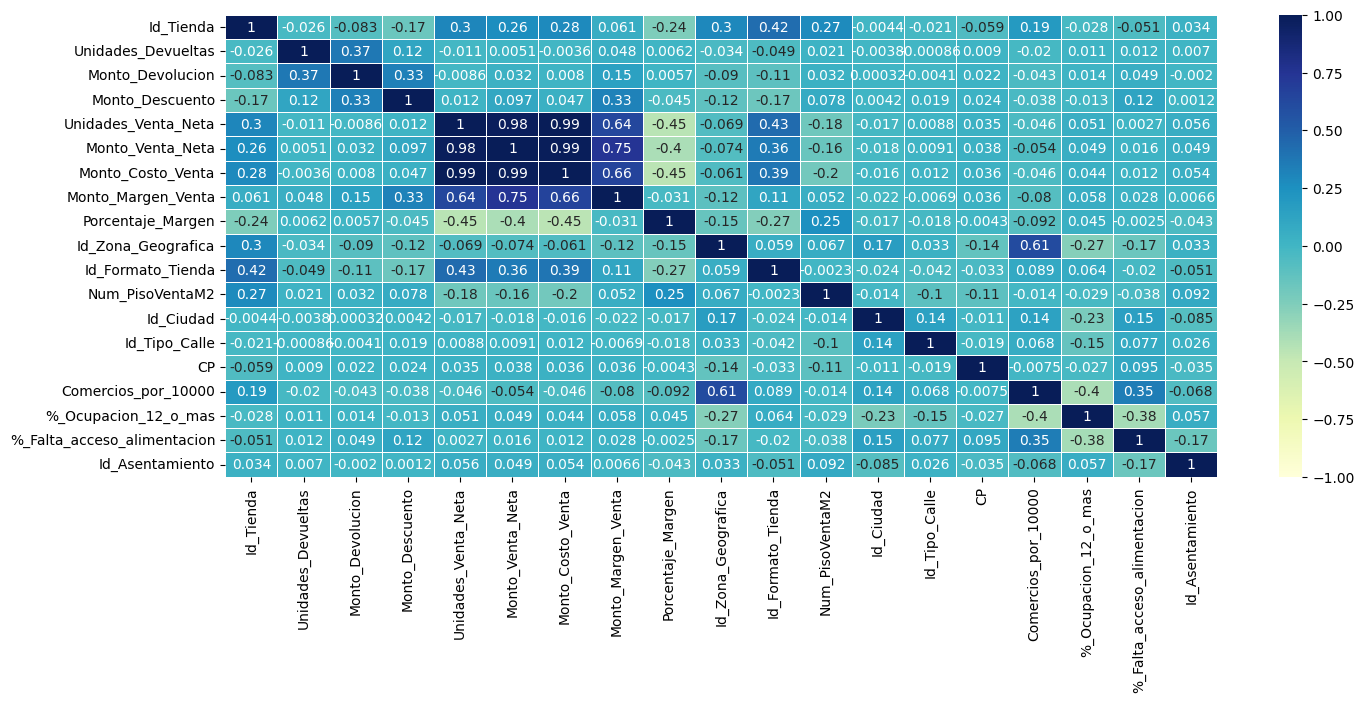

In [ ]:
# Obtener la matriz de correlacion usando un mapa de calor
plt.figure(figsize=(16, 6))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

**Se observa que en la variable a predecir que es Porcentaje_Margen, tiene una correlacion lineal con las demas variables casi nula, excepto en 3 variables (Unidades_Venta_Neta, Monto_Venta_Neta ,Monto_Costo_Venta)**

In [ ]:
sns.pairplot(df, x_vars=['Unidades_Venta_Neta', 'Monto_Venta_Neta' ,'Monto_Costo_Venta'], y_vars='Porcentaje_Margen', height=7, aspect=0.8,kind = 'reg')

NameError: ignored

In [ ]:
df_2.info()

In [ ]:
sns.boxplot(df_2["Unidades_Venta_Neta"])

In [ ]:
sns.pairplot(df, x_vars=['Unidades_Venta_Neta', 'Monto_Venta_Neta' ,'Monto_Costo_Venta'], y_vars='Porcentaje_Margen', height=7, aspect=0.8,kind = 'reg')

## REGRESIÓN LINEAL MÚLTIPLE



### Utilizando solo las 3 variables con correlación

Dividir en datos de entrenamiento (train) y datos de validación (test) y ejecutar 5 veces el modelo.

In [ ]:
# Se copia solo las variables que tienen mínima correlación lineal de acuerdo al mapa de calor
X_lineal = df[['Unidades_Venta_Neta', 'Monto_Venta_Neta' ,'Monto_Costo_Venta']]
y  = df['Porcentaje_Margen']                # Variable a predecir

In [ ]:
# Divide el dataset en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X_lineal, y, test_size=0.3)

# Crea el objeto
lr = LinearRegression()

# Entrena el modelo
lr.fit(X_train, y_train)

# Predice valores
y_predict = lr.predict(X_test)

print(f" R2:",round(lr.score(X_train, y_train),5))
# print(f"Train MSE: {round(mean_squared_error(y_train, y_predict),5)}")  # Debe de ser mismo numero de datos
print(f"MSE: {round(mean_squared_error(y_test, y_predict),5)}")

 R2: 0.45243
MSE: 0.0109


**Despues de las 5 corridas, se obtuvo un promedio de R2 de 0.3995 y de MSE de 0.0082.
Lo que se puede decir que el MSE es casi 0, y R2 nos dice que la variable dependiente es predicha en un *40%* por las 3 variables independientes.**

In [ ]:
b0 = round(lr.intercept_,4)
b1 = lr.coef_[0]
b2 = lr.coef_[1]
b3 = lr.coef_[2]
print (b0, b1, b2, b3)

0.3356 7.275944972888662e-06 1.4047732615478497e-06 -2.2561232865134403e-06


### Validación Cruzada con todo el Dasaset

**Puesto que se pretende usar todas las variables del Dataset para predecir la variable  Porcentaje_Margen, se aplica la Regresión Lineal Múltiple a todo el Dataset.**

In [ ]:
# Se copia todo el Dataset, eliminando la variable a predecir
X = df.drop('Porcentaje_Margen', axis=1) 
y = df['Porcentaje_Margen']                # Variable a predecir

# Validación Cruzada con todo el dataset y el modelo generado arriba
scores = cross_val_score(lr, X, y, scoring='r2',cv=10)

print(scores)
print('Promedio de precisión (R2): %.5f +/- %.5f' % (np.mean(scores), np.std(scores)))

[-2.49071531e+01  4.50027084e-01  2.82198747e-01  2.13923545e-01
  1.59271362e-01  8.85549514e-02  6.07666503e-01 -1.91933866e+12
  2.77528562e-01  2.27000265e-01]
Promedio de precisión (R2): -191933865616.64069 +/- 575801596842.38855


**Se observa que la mayoría de los valores de R2 son menores a 0.5, excepto en una corrida (7a) y hay dos valores negativos menores a -1 (1ª y 8ª corrida), lo que indica que el modelo no funciono. El promedio de R2 de los valores positivos es de 0.2883, lo que indica que la variable dependiente es predicha en un 28.83% por las variables independientes.**

### Validación Cruzada con Clipping y Escalamiento con todo el Dataset

In [ ]:
# Defina la función que hace Clipping
def clip_features(df, iqr_score, clip_top, clip_bottom):
  iqr = df.quantile(0.75) - df.quantile(0.25)
  limite_superior = df.quantile(0.75) + (iqr * iqr_score)
  limite_inferior = df.quantile(0.25) - (iqr * iqr_score)
  new_df = df.copy()
  if (clip_top):
     new_df = np.where(new_df > limite_superior, limite_superior, new_df)
  if (clip_bottom):
     new_df = np.where(new_df < limite_inferior, limite_inferior, new_df)
  return new_df

In [ ]:
# Clipping a las 3 variables 
X["Unidades_Venta_Neta"] = clip_features(X["Unidades_Venta_Neta"], 0.75, True, True)
X["Monto_Venta_Neta"]    = clip_features(X["Monto_Venta_Neta"], 0.75, True, True)
X["Monto_Costo_Venta"]   = clip_features(X["Monto_Costo_Venta"], 0.75, True, True)

In [ ]:
from sklearn import preprocessing

In [ ]:
# Divide el dataset en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Escala los datos del Dataset de entrenamiento
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

# Crea el objeto
lr_2 = LinearRegression()

# Entrena el modelo
lr_2.fit(X_train_transformed, y_train)

# Escala los datos del Dataset de prueba
X_test_transformed = scaler.transform(X_test)

# Predice valores
y_predict = lr_2.predict(X_test_transformed)

print(f" R2:",round(lr_2.score(X_train_transformed, y_train),5))
# print(f"Train MSE: {round(mean_squared_error(y_train, y_predict),5)}")  # Debe de ser mismo numero de datos
print(f"MSE: {round(mean_squared_error(y_test, y_predict),5)}")

 R2: 0.43143
MSE: 0.00262


In [ ]:
# Validación Cruzada 
scores = cross_val_score(lr_2, X, y, cv=10)
print(scores)
print('Promedio de precisión (R2): %.5f +/- %.5f' % (np.mean(scores), np.std(scores)))

[-8.71639384  0.52373889  0.40328698  0.14267654  0.3330662   0.22268378
  0.42999194  0.49582495  0.6488001   0.0126655 ]
Promedio de precisión (R2): -0.55037 +/- 2.72793


**Se observa que en la 1ª corrida hay un valor negativo menor a -1, esto indica que el modelo no funciono. El promedio de R2 de los valores positivos es de 0.3570, lo que indica que la variable dependiente es predicha en un 35.70% por las variables independientes de todo el Dataset.
Al aplicar Clipping y Escalamiento a todo el Dataset, el modelo mejoró solo un 6.87%.**

## REGRESIÓN POLINOMIAL

In [ ]:
X = df.drop('Porcentaje_Margen', axis=1)
y = df['Porcentaje_Margen']                # Variable a predecir

### Dividir en datos de entrenamiento (train) y datos de validación (test) y ejecutar 5 veces el modelo para cada grado del polinomio.

### Polinomio Grado 1

In [ ]:
# Define función que calcula la Regresión Polinomial de grado 1
def Polinomio_grado1(X, y):
   # Divide el dataset en datos de entrenamiento y datos de prueba
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
   # Crea el objeto
   poly = PolynomialFeatures(degree=1)      # Grado del Polinomio
   lr = LinearRegression()
   # Normaliza (estandariza) los datos
   Xpolytrain = poly.fit_transform(X_train)
   Xpolytest  = poly.fit_transform(X_test)
   # Entrena el modelo
   lr.fit(Xpolytrain, y_train)
   # Predice valores
   y_predict = lr.predict(Xpolytest)
   #print(f"R2 : {round(lr.score(Xpolytrain, y_train),4)}")
   #print(f"MSE: {round(mean_squared_error(y_test, y_predict),5)}")
   #print('Coeficients: ' + str(lr.coef_) + ', b = ' + str(lr.intercept_))
   return lr.score(Xpolytrain, y_train), mean_squared_error(y_test, y_predict)

In [ ]:
score_acum = 0
mse_acum = 0
for i in range(5):
    print(f'{i+1}a corrida:   Polinomio grado 1')
    score, mse = Polinomio_grado1(X, y)
    print("R2= ", score,"MSE= ",mse)
    score_acum = score_acum + score 
    mse_acum = mse_acum + mse
score_acum = score_acum / (i+1)
mse_acum = mse_acum / (i+1)
print("Promedios:")
print(f"R2 : {round(score_acum,5)}")
print(f"MSE: {round(mse_acum,5)}")

1a corrida:   Polinomio grado 1
R2=  0.561703950799809 MSE=  0.010705297745137681
2a corrida:   Polinomio grado 1
R2=  0.36660168434815754 MSE=  0.0028835591084201465
3a corrida:   Polinomio grado 1
R2=  0.56216410412622 MSE=  0.010741338304083844
4a corrida:   Polinomio grado 1
R2=  0.3775054806583992 MSE=  0.003532014766646059
5a corrida:   Polinomio grado 1
R2=  0.36954000415142707 MSE=  0.0029335388688046895
Promedios:
R2 : 0.4475
MSE: 0.00616


### Polinomio Grado 2

In [ ]:
# Define función que calcula la Regresión Polinomial de grado 2
def Polinomio_grado2(X, y):
   # Divide el dataset en datos de entrenamiento y datos de prueba
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
   # Crea el objeto
   poly = PolynomialFeatures(degree=2)      # Grado del Polinomio
   lr = LinearRegression()
   # Normaliza (estandariza) los datos
   Xpolytrain = poly.fit_transform(X_train)
   Xpolytest  = poly.fit_transform(X_test)
   # Entrena el modelo
   lr.fit(Xpolytrain, y_train)
   # Predice valores
   y_predict = lr.predict(Xpolytest)
   #print(f"R2 : {round(lr.score(Xpolytrain, y_train),4)}")
   #print(f"MSE: {round(mean_squared_error(y_test, y_predict),5)}")
   #print('Coeficients: ' + str(lr.coef_) + ', b = ' + str(lr.intercept_))
   return lr.score(Xpolytrain, y_train), mean_squared_error(y_test, y_predict)

In [ ]:
score_acum = 0
mse_acum = 0
for i in range(5):
    print(f'{i+1}a corrida:   Polinomio grado 2')
    score, mse = Polinomio_grado2(X, y)
    print("R2= ", score,"MSE= ",mse)
    score_acum = score_acum + score 
    mse_acum = mse_acum + mse
score_acum = score_acum / (i+1)
mse_acum = mse_acum / (i+1)
print("Promedios:")
print(f"R2 : {round(score_acum,5)}")
print(f"MSE: {round(mse_acum,5)}")

1a corrida:   Polinomio grado 2
R2=  0.7969135447365586 MSE=  12206959948.59686
2a corrida:   Polinomio grado 2
R2=  0.5350233469098549 MSE=  158046914745.20013
3a corrida:   Polinomio grado 2
R2=  0.5386955425078906 MSE=  913016149050.6808
4a corrida:   Polinomio grado 2
R2=  0.5416109425323898 MSE=  0.00121565955122713
5a corrida:   Polinomio grado 2
R2=  0.537826138019496 MSE=  0.0012958977026362446
Promedios:
R2 : 0.59001
MSE: 216654004748.89603


### Polinomio Grado 3

In [ ]:
# Define función que calcula la Regresión Polinomial de grado 3
def Polinomio_grado3(X, y):
   # Divide el dataset en datos de entrenamiento y datos de prueba
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
   # Crea el objeto
   poly = PolynomialFeatures(degree=3)      # Grado del Polinomio
   lr = LinearRegression()
   # Normaliza (estandariza) los datos
   Xpolytrain = poly.fit_transform(X_train)
   Xpolytest  = poly.fit_transform(X_test)
   # Entrena el modelo
   lr.fit(Xpolytrain, y_train)
   # Predice valores
   y_predict = lr.predict(Xpolytest)
   #print(f"R2 : {round(lr.score(Xpolytrain, y_train),4)}")
   #print(f"MSE: {round(mean_squared_error(y_test, y_predict),5)}")
   #print('Coeficients: ' + str(lr.coef_) + ', b = ' + str(lr.intercept_))
   return lr.score(Xpolytrain, y_train), mean_squared_error(y_test, y_predict)

In [ ]:
score_acum = 0
mse_acum = 0
for i in range(5):
    print(f'{i+1}a corrida:   Polinomio grado 3')
    score, mse = Polinomio_grado3(X, y)
    print("R2= ", score,"MSE= ",mse)
    score_acum = score_acum + score 
    mse_acum = mse_acum + mse
score_acum = score_acum / (i+1)
mse_acum = mse_acum / (i+1)
print("Promedios:")
print(f"R2 : {round(score_acum,5)}")
print(f"MSE: {round(mse_acum,5)}")

###Concentrado de resultados

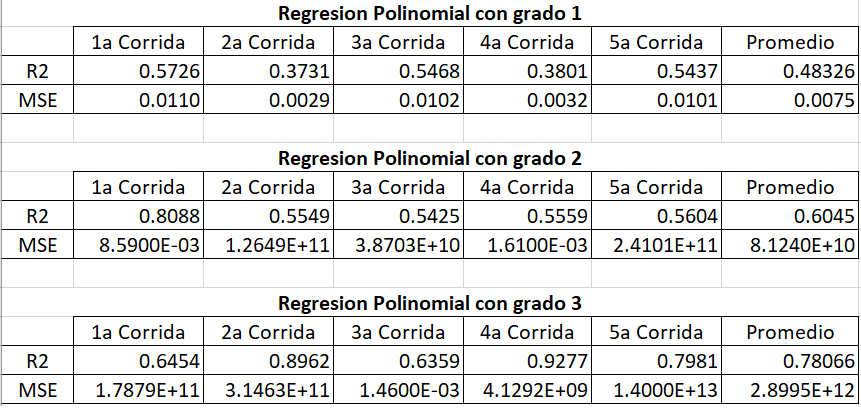

**No se continuo con el polinomio de grado 4, porque se saturaba la memoria RAM y el algoritmo dejaba de funcionar, esto debido al número de registros a procesar y a la complejidad del polinomio grado 4.**

**En conclusión**

**La Regresión Polinomial es mejor que la Regresión Lineal Múltiple.**

**La Regresión Polinomial de grado 3, es la que tiene un R2 más alto, pero el MSE es muy grande.**

# **Árboles y Bosques**

## Carga de datos

In [ ]:
#import gc
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from IPython.display import Image
import pydot
from six import StringIO
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto F3M2 - Machine Learning/Data/DataSet Ventas completo 29ABR23.csv')
# Asigna directorio de trabajo y dataset
directory ="/content/drive/MyDrive/Colab Notebooks/Datasets Proyecto/"
file = 'DataSet Ventas completo 29ABR23.csv'

In [ ]:
# Carga el dataset
df = pd.read_csv(directory+file, header=0)

## Exploración de datos

In [ ]:
df.shape

(139987, 32)

In [ ]:
df.head()

,Id_Tienda,Dia,Unidades_Devueltas,Monto_Devolucion,Monto_Descuento,Unidades_Venta_Neta,Monto_Venta_Neta,Monto_Costo_Venta,Monto_Margen_Venta,Porcentaje_Margen,...,Descripcion_Ciudad,Id_Tipo_Calle,Descricpion_Tipo_Calle,CP,Asentamiento,Latitud,Longitud,Comercios_por_10000,%_Ocupacion_12_o_mas,%_Falta_acceso_alimentacion
0,227,20220101,13,335.581218,2503.056998,2088,60223.2535,38781.96635,21441.28715,0.356030,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
1,227,20220102,0,0.000000,2296.849486,3477,92279.0535,55668.88236,36610.17114,0.396733,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
2,227,20220103,0,0.000000,1496.648722,2287,57433.1035,34253.51394,23179.58956,0.403593,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
3,227,20220104,1,38.098550,956.751624,1448,39028.4135,24143.79344,14884.62006,0.381379,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
4,227,20220105,1,34.330814,833.328276,1244,30844.0935,19240.64886,11603.44464,0.376197,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139987 entries, 0 to 139986
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Id_Tienda                    139987 non-null  int64  
 1   Dia                          139987 non-null  int64  
 2   Unidades_Devueltas           139987 non-null  int64  
 3   Monto_Devolucion             139987 non-null  float64
 4   Monto_Descuento              139987 non-null  float64
 5   Unidades_Venta_Neta          139987 non-null  int64  
 6   Monto_Venta_Neta             139987 non-null  float64
 7   Monto_Costo_Venta            139987 non-null  float64
 8   Monto_Margen_Venta           139987 non-null  float64
 9   Porcentaje_Margen            139987 non-null  float64
 10  Descripcion_Tienda           139987 non-null  object 
 11  Id_Tipo_Tienda               139987 non-null  int64  
 12  Descripcion_Tipo_Tienda      139987 non-null  object 
 13 

In [ ]:
# Verificar cuantos valores diferentes tienen las variables
result = df.apply(lambda x: x.value_counts(dropna=True, sort=True)).count()
print('Variable              Num. de valores')
result

Variable              Num. de valores


Id_Tienda                         329
Dia                               455
Unidades_Devueltas                594
Monto_Devolucion                38774
Monto_Descuento                112231
Unidades_Venta_Neta             15548
Monto_Venta_Neta               139153
Monto_Costo_Venta              139970
Monto_Margen_Venta             139984
Porcentaje_Margen              139929
Descripcion_Tienda                329
Id_Tipo_Tienda                      1
Descripcion_Tipo_Tienda             1
Id_Zona_Geografica                  7
Descripcion_Zona_Geografica         7
Id_Formato_Tienda                   7
Descripcion_Formato_Tienda          7
Fecha_Apertura                      1
Num_PisoVentaM2                    97
Id_Estado                           1
Desc_Estado                         1
Id_Ciudad                          11
Descripcion_Ciudad                 11
Id_Tipo_Calle                       7
Descricpion_Tipo_Calle              7
CP                                113
Asentamiento

## Limpieza del dataset

In [ ]:
# Se convierte el asentamiento en categórico
df['Id_Asentamiento'] = df['Asentamiento'].astype('category').cat.codes
df_original = df.copy()

In [ ]:
df = df.drop(columns=[ 'Descripcion_Tienda'
                     , 'Descripcion_Tipo_Tienda'
                     , 'Descripcion_Zona_Geografica'
                    #  , 'Descripcion_Formato_Tienda'
                     , 'Desc_Estado'
                     , 'Descripcion_Ciudad'
                    #  , 'Descricpion_Tipo_Calle'
                     , 'Asentamiento'
                     ])

In [ ]:
df = df.drop(columns=['Id_Tienda', 'Fecha_Apertura', 'Id_Estado', 'Id_Tipo_Tienda', 'Dia', 'Latitud', 'Longitud'])

In [ ]:
df.dtypes

Unidades_Devueltas               int64
Monto_Devolucion               float64
Monto_Descuento                float64
Unidades_Venta_Neta              int64
Monto_Venta_Neta               float64
Monto_Costo_Venta              float64
Monto_Margen_Venta             float64
Porcentaje_Margen              float64
Id_Zona_Geografica               int64
Id_Formato_Tienda                int64
Descripcion_Formato_Tienda      object
Num_PisoVentaM2                  int64
Id_Ciudad                        int64
Id_Tipo_Calle                    int64
Descricpion_Tipo_Calle          object
CP                               int64
Comercios_por_10000            float64
%_Ocupacion_12_o_mas           float64
%_Falta_acceso_alimentacion    float64
Id_Asentamiento                  int16
dtype: object

In [ ]:
#Identificar si existen variables con valores NaN
df.isna().sum(axis=0)

Unidades_Devueltas             0
Monto_Devolucion               0
Monto_Descuento                0
Unidades_Venta_Neta            0
Monto_Venta_Neta               0
Monto_Costo_Venta              0
Monto_Margen_Venta             0
Porcentaje_Margen              0
Id_Zona_Geografica             0
Id_Formato_Tienda              0
Descripcion_Formato_Tienda     0
Num_PisoVentaM2                0
Id_Ciudad                      0
Id_Tipo_Calle                  0
Descricpion_Tipo_Calle         0
CP                             0
Comercios_por_10000            0
%_Ocupacion_12_o_mas           0
%_Falta_acceso_alimentacion    0
Id_Asentamiento                0
dtype: int64

In [ ]:
def clip_features(df, iqr_score, clip_top, clip_bottom):
  iqr = df.quantile(0.75) - df.quantile(0.25)
  limite_superior = df.quantile(0.75) + (iqr * iqr_score)
  limite_inferior = df.quantile(0.25) - (iqr * iqr_score)
  new_df = df.copy()
  if (clip_top):
    new_df = np.where(new_df > limite_superior, limite_superior, new_df)
  if (clip_bottom):
    new_df = np.where(new_df < limite_inferior, limite_inferior, new_df)
  return new_df

def escalar_a_01(df):
  df_escalado = df.copy()
  for column in df.columns:
    if(df[column].dtype!=object):
      df_escalado[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
  # df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado

In [ ]:
# Escalar los datos numericos del Dataset
df_escalado = escalar_a_01(df)

<Axes: >

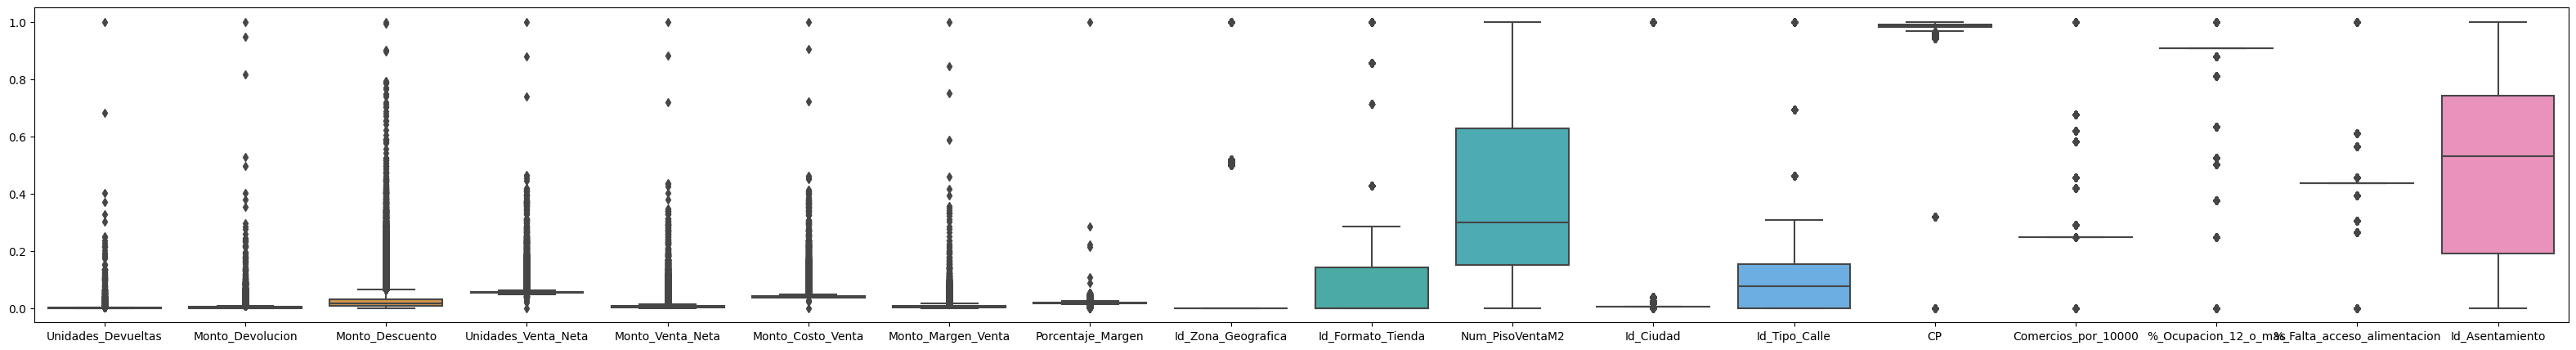

In [ ]:
# Grafica boxplot para observar datos atipicos en cada una de las variables numericas
fig = plt.figure(figsize=(40, 5))
ax = fig.add_subplot()
sns.boxplot(data=df_escalado, ax=ax)

## Revisión de las características de la variable a predecir: Porcentaje_Margen

### Revisión

In [ ]:
def calcular_precision(TP, TN, FP, FN):
    precision = (TP + TN) / (TP + TN + FP + FN)
    precision = precision * 100
    return precision

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

In [ ]:
df['Porcentaje_Margen'].describe()

count    139987.000000
mean          0.339138
std           0.094460
min           0.008257
25%           0.316167
50%           0.342260
75%           0.371736
max          18.093986
Name: Porcentaje_Margen, dtype: float64

<Axes: >

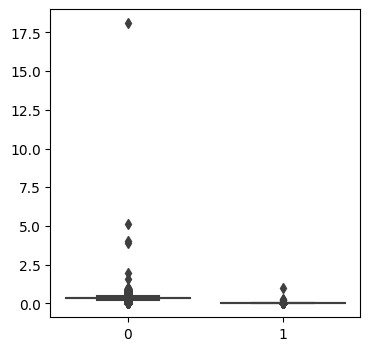

In [ ]:
# Grafica boxplot para observar datos atipicos en cada una de las variables numericas
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
sns.boxplot(data=[df['Porcentaje_Margen'],df_escalado['Porcentaje_Margen']], ax=ax)

### Como se observa en el boxplot previo los valores de Porcentaje_Margen están concentrados en un rango muy pequeño, ya sea desde sus valores originales o ajustados a 0-1, en ambos casos presenta outliers fuera de rango, muy altos, por lo anterior se procede al ajuste vía clipping.

In [ ]:
df_clipped = df.copy()
df_clipped['Porcentaje_Margen'] = clip_features(df_clipped['Porcentaje_Margen'], 1.5, True, True)

In [ ]:
df_clipped['Porcentaje_Margen'].describe()

count    139987.000000
mean          0.343118
std           0.050374
min           0.232814
25%           0.316167
50%           0.342260
75%           0.371736
max           0.455089
Name: Porcentaje_Margen, dtype: float64

<Axes: >

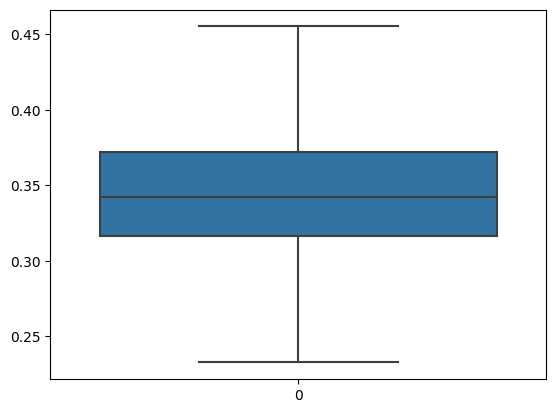

In [ ]:
sns.boxplot(df_clipped["Porcentaje_Margen"])

## Se manejaran solo dos posibles valores para la variable que pretendemos predecir, Porcentaje_Margen solo podrá pronosticarse en Bajo y Alto, por lo que tendremos solo 2 bines de valores.

In [ ]:
# Convirtiendo la variable numérica a categórica en 2 bins
df_clipped['Porcentaje_Margen'] = pd.cut(x=df_clipped['Porcentaje_Margen'], bins=2, labels=['bajo', 'alto'])
df_clipped.groupby(['Porcentaje_Margen'])['Porcentaje_Margen'].count()

Porcentaje_Margen
bajo    72560
alto    67427
Name: Porcentaje_Margen, dtype: int64

## **Selección de variables para los modelos:**

1.   Id_Formato_Tienda: Formato de tienda
2.   Num_PisoVentaM2: Piso de Venta en M2
3.   Id_Tipo_Calle: Tipo de calle
4.   Comercios_por_10000: Cantidad de comercios por cada 10,000 habitantes
5.   %_Ocupacion_12_o_mas: Porcentaje de población de 12 años o mas ocupada
6.   %_Falta_acceso_alimentacion: Porcentaje de población que se saltó una comida
7.   CP: Código Postal de la Tienda
8.   Asentamiento (categorizado): Colonia en donde se encuentra ubicada la tienda

Se descartan variables relacionadas a la venta tal como: día, unidades y monto, etc., ya que esas finalmente se reflejan en el resultado de la venta y lo que se pretende predecir, el Porcentaje del Margen, es a partir de las características de la localidad en donde se ubicaría la tienda.
Por lo anterior también se descartan variables que que no ayudan directamente la localidad de la tienda tal como: latitud, longitud, Ciudad, Estado, etc, porque lo se busca es un modelo flexible y abierto y no restringido a la localidad, sin embargo se incluye CP y Asentamiento (categorizado) por si se busca explorar el modelo con variantes en la misma localidad.





In [ ]:
variables = [ 
             'Porcentaje_Margen'
           , 'Id_Formato_Tienda'
           , 'Num_PisoVentaM2'
           , 'Id_Tipo_Calle'
           , 'Comercios_por_10000'
           , '%_Ocupacion_12_o_mas'
           , '%_Falta_acceso_alimentacion'
           , 'CP'
           , 'Id_Asentamiento'
           ]

In [ ]:
df_clipped[variables].head()

,Porcentaje_Margen,Id_Formato_Tienda,Num_PisoVentaM2,Id_Tipo_Calle,Comercios_por_10000,%_Ocupacion_12_o_mas,%_Falta_acceso_alimentacion,CP,Id_Asentamiento
0,alto,105,169,5,70.38,0.4484,0.089957,32800,15
1,alto,105,169,5,70.38,0.4484,0.089957,32800,15
2,alto,105,169,5,70.38,0.4484,0.089957,32800,15
3,alto,105,169,5,70.38,0.4484,0.089957,32800,15
4,alto,105,169,5,70.38,0.4484,0.089957,32800,15


## **Árbol de Decisión**

### Entrenamiento y resultados.

In [ ]:
X = df_clipped[variables].drop(columns='Porcentaje_Margen')
y = df_clipped['Porcentaje_Margen']

feature_names = X.columns
labels = y.unique()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
tree_clf = DecisionTreeClassifier()

In [ ]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
(TN, FP, FN, TP) = matrix.ravel()

In [ ]:
calcular_precision(TP, TN, FP, FN)

72.50756006381408

In [ ]:
calcular_sensibilidad(TP, TN, FP, FN)

75.05267979844251

In [ ]:
calcular_especificidad(TP, TN, FP, FN)

69.75256607328805

In [ ]:
# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(tree_clf.feature_names_in_, tree_clf.feature_importances_):
    print(name + ': ' + str(importance))

Id_Formato_Tienda: 0.4341411087735885
Num_PisoVentaM2: 0.2339399674560599
Id_Tipo_Calle: 0.014938819538372762
Comercios_por_10000: 0.18066916514855738
%_Ocupacion_12_o_mas: 0.005657643540719294
%_Falta_acceso_alimentacion: 0.00021163415617332206
CP: 0.05278972993460589
Id_Asentamiento: 0.0776519314519229


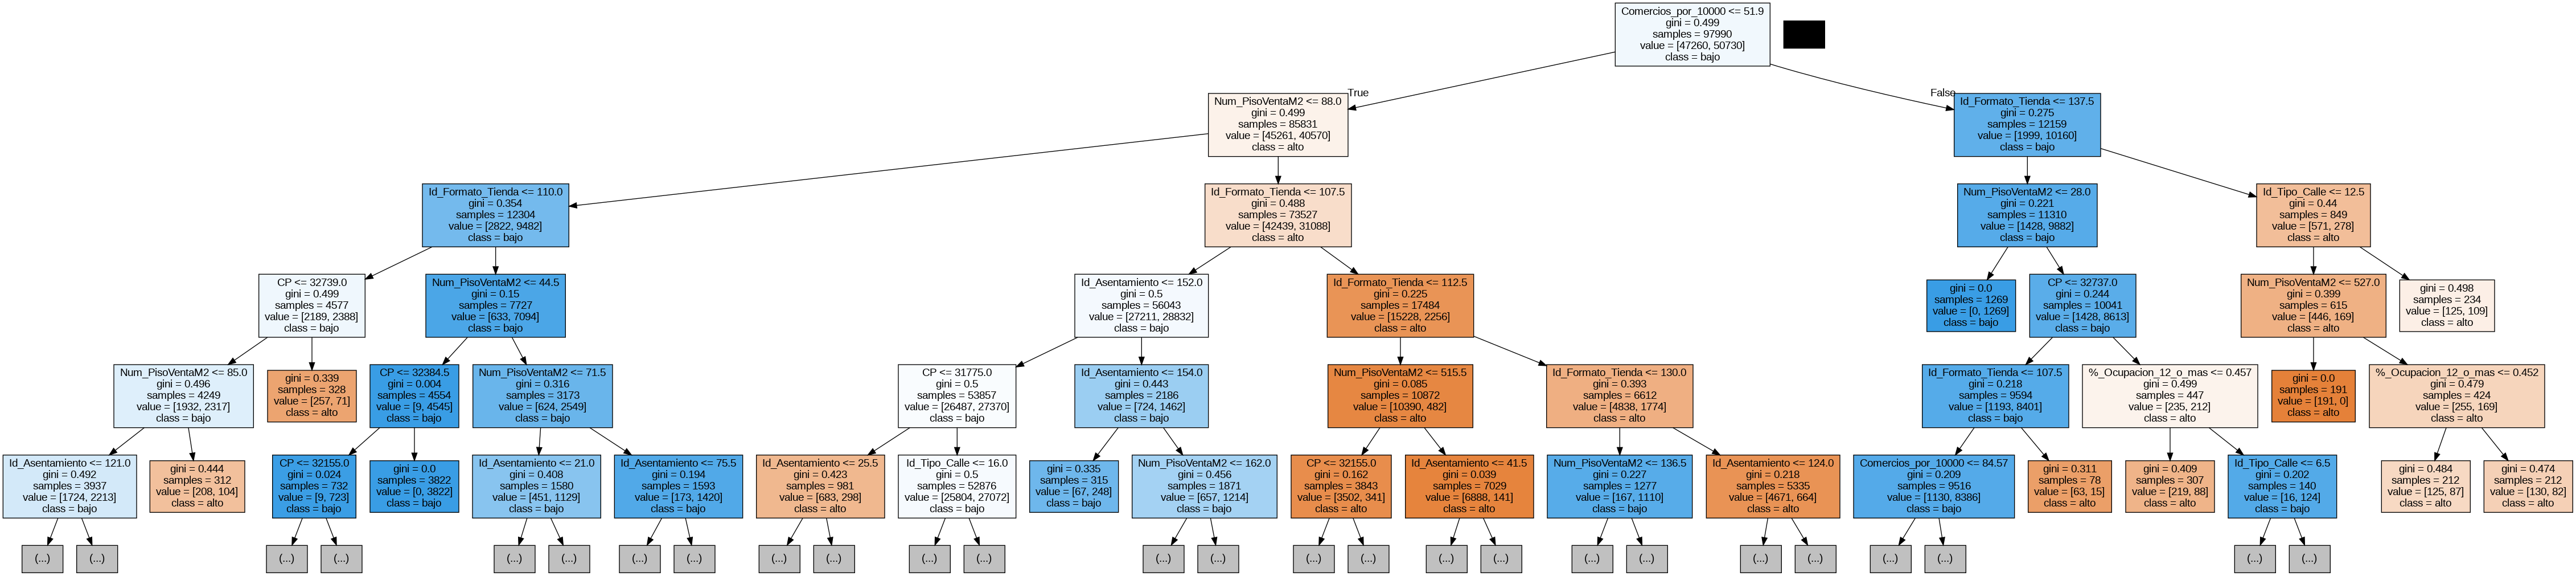

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=X.columns, filled=True, max_depth=5, class_names=labels)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
#export the decision rules
tree_rules = export_text(tree_clf, feature_names = list(feature_names))
#print the result
print(tree_rules)

|--- Comercios_por_10000 <= 51.90
|   |--- Num_PisoVentaM2 <= 88.00
|   |   |--- Id_Formato_Tienda <= 110.00
|   |   |   |--- CP <= 32739.00
|   |   |   |   |--- Num_PisoVentaM2 <= 85.00
|   |   |   |   |   |--- Id_Asentamiento <= 121.00
|   |   |   |   |   |   |--- Id_Asentamiento <= 88.00
|   |   |   |   |   |   |   |--- CP <= 32035.00
|   |   |   |   |   |   |   |   |--- class: bajo
|   |   |   |   |   |   |   |--- CP >  32035.00
|   |   |   |   |   |   |   |   |--- CP <= 32599.50
|   |   |   |   |   |   |   |   |   |--- Id_Asentamiento <= 12.00
|   |   |   |   |   |   |   |   |   |   |--- class: bajo
|   |   |   |   |   |   |   |   |   |--- Id_Asentamiento >  12.00
|   |   |   |   |   |   |   |   |   |   |--- Id_Tipo_Calle <= 9.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: alto
|   |   |   |   |   |   |   |   |   |   |--- Id_Tipo_Calle >  9.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: alto
|   |   |   |   |   |   |   |   |--- CP >  32599.50
|   |   |   | 

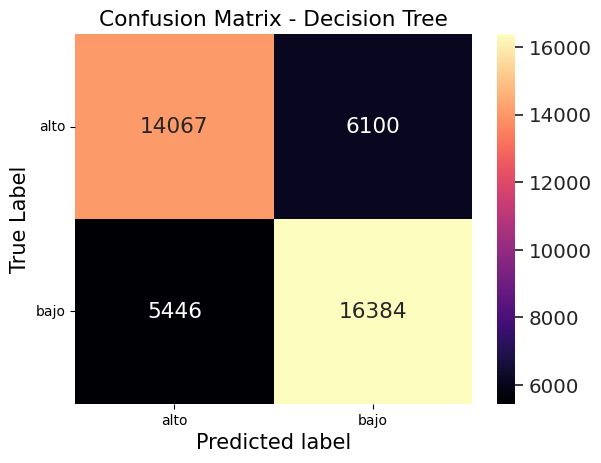

<Figure size 1000x700 with 0 Axes>

In [ ]:
#turn this into a dataframe
matrix_df = pd.DataFrame(matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

### **Conclusiones (árbol de decisión)**
Después de modelar de distintas formas el árbol, seleccionar las variables adecuadas para el modelo e incluso utilizar la conversión de variables categóricas no numéricas a numéricas, el modelo que se presenta es el mas adecuado con resultados constantes y consistentes de:
* Precisión: 72.86
* Sensibilidad: 76.23
* Especificidad: 69.20

Las variables de mayor importancia para el modelo (suman 0.845) son:
* Id_Formato_Tienda: 0.438
* Num_PisoVentaM2: 0.220
* Comercios_por_10000: 0.187

Por sus características describe un modelo balanceado y que puede ser generalizado con las características que evalúa para el objetivo de predecir si obtendrá un margen alto o bajo de ventas.

## **Bosques Aleatorios**

### Entrenamiento, búsqueda del mejor árbol y resultados.

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf.predict(X_test)

In [ ]:
rf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
(TN, FP, FN, TP) = matrix.ravel()

In [ ]:
calcular_precision(TP, TN, FP, FN)

72.50756006381408

In [ ]:
calcular_sensibilidad(TP, TN, FP, FN)

75.05267979844251

In [ ]:
calcular_especificidad(TP, TN, FP, FN)

69.75256607328805

In [ ]:
n_estimators = [100, 500]
max_features = ['auto', 'log2']
max_depth = [3, 5]
min_samples_split = [5, 10]
min_samples_leaf = [1, 4]
bootstrap = [True]

In [ ]:
params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [ ]:
grid_search_cv = GridSearchCV(rf_clf, params_grid, scoring='f1', cv=3, verbose=1, n_jobs=3)

In [ ]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True], 'max_depth': [3, 5],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 500]},
             scoring='f1', verbose=1)

In [ ]:
best_params = grid_search_cv.best_params_

In [ ]:
rf_clf_optimized = RandomForestClassifier(**best_params)

In [ ]:
rf_clf_optimized.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=3, max_features='auto', min_samples_split=5)

In [ ]:
y_pred_optim = rf_clf.predict(X_test)

In [ ]:
rf_optim_matrix = confusion_matrix(y_test, y_pred_optim)

In [ ]:
(TN, FP, FN, TP) = rf_optim_matrix.ravel()

In [ ]:
calcular_precision(TP, TN, FP, FN)

72.50756006381408

In [ ]:
calcular_sensibilidad(TP, TN, FP, FN)

75.05267979844251

In [ ]:
calcular_especificidad(TP, TN, FP, FN)

69.75256607328805

In [ ]:
# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(feature_names, rf_clf_optimized.feature_importances_):
    print(name + ': ' + str(importance))

Id_Formato_Tienda: 0.21587371255419663
Num_PisoVentaM2: 0.2574486996585609
Id_Tipo_Calle: 0.009415602456187224
Comercios_por_10000: 0.20282294022021838
%_Ocupacion_12_o_mas: 0.11904962993628017
%_Falta_acceso_alimentacion: 0.10098690288148732
CP: 0.07254032872843741
Id_Asentamiento: 0.021862183564631935


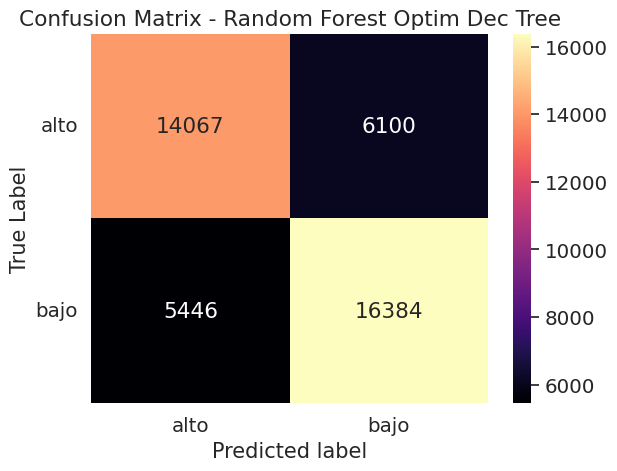

<Figure size 1000x700 with 0 Axes>

In [ ]:
#turn this into a dataframe
matrix_df = pd.DataFrame(rf_optim_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Random Forest Optim Dec Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

### **Conclusiones (bosques aleatorios)**

Los resultado obtenidos del modelo de bosques aleatorios fueron muy similares con el de árbol de decisión, y una vez obtenido el optimizado, los valores de :
* Precisión: 72.51
* Sensibilidad: 75.05
* Especificidad: 69.75

Fueron muy similares a los de árbol de decisión, los cual nos lleva a explorar el peso de las variables y encontramos que el TOP3 que suma 0.686, 
* Id_Formato_Tienda: 0.226
* Num_PisoVentaM2: 0.257
* Comercios_por_10000: 0.203

Encontramos ahora dos variables que suman y redistribuyen el peso, y por lo anterior las podemos considerar relavantes:
* %_Ocupacion_12_o_mas: 0.119
* %_Falta_acceso_alimentacion: 0.101

La matriz de confusión obtenida fue idéntica con respecto a árbol de decisión, lo que nos permite concluir que, la optimización de Bosques Aleatorios nos permite rebalancear el peso y ponderación de las variables.


# **Redes Neuronales y Naive Bayes**

## Librerías y Definición de Funciones

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import  pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix

In [ ]:
def clip_features(df, iqr_score, clip_top, clip_bottom):
  iqr = df.quantile(0.75) - df.quantile(0.25)
  limite_superior = df.quantile(0.75) + (iqr * iqr_score)
  limite_inferior = df.quantile(0.25) - (iqr * iqr_score)

  new_df = df.copy()

  if (clip_top):
    new_df = np.where(new_df > limite_superior, limite_superior, new_df)
  if (clip_bottom):
    new_df = np.where(new_df < limite_inferior, limite_inferior, new_df)

  return new_df


def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado


def one_hot(df):
    res = pd.DataFrame()
    for column in df.columns.values:
        res = pd.concat([res, pd.get_dummies(df[column], prefix=column)], axis =1)

    return res

msj = "Cat'n divide by 0"


def calcular_precision(TP, TN, FP, FN):
    if (TP + TN + FP + FN) == 0:
        return msj

    precision = (TP + TN) / (TP + TN + FP + FN)
    precision = precision * 100
    return precision


def calcular_sensibilidad(TP, FN):
    if (TP + FN) == 0:
        return msj

    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad


def calcular_especificidad(TN, FP):
    if (TN + FP) == 0:
        return msj

    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad


def evaluar_modelo(test, pred):
    matrix = confusion_matrix(test, pred, labels=[0, 1])
    (TN, FP, FN, TP) = matrix.ravel()
    print(f"Exactitud: {calcular_precision(TP, TN, FP, FN)}")
    print(f"Sensibilidad: {calcular_sensibilidad(TP, FN)}")
    print(f"Especificidad: {calcular_especificidad(TN, FP)}")


### Cargando el dataset

In [ ]:
# Conecta al repositorio de Google

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Asigna directorio de trabajo y dataset

#directory ="/content/drive/MyDrive/Data Science Eq. 16/Proyecto F3M2 - Machine Learning/Data/"
#file = 'DataSet Ventas completo 29ABR23.csv'

In [ ]:
# Carga el dataset

#df = pd.read_csv(directory+file, header=0, index_col=0)
df = pd.read_csv("G:/.shortcut-targets-by-id/1ogtyOQnGAWIbqkfTVRHGVFSOPAYmyEYE/Data Science Eq. 16/Proyecto F3M2 - Machine Learning/Data/DataSet Ventas completo 29ABR23.csv", index_col = 0)
df.head()

,Dia,Unidades_Devueltas,Monto_Devolucion,Monto_Descuento,Unidades_Venta_Neta,Monto_Venta_Neta,Monto_Costo_Venta,Monto_Margen_Venta,Porcentaje_Margen,Descripcion_Tienda,...,Descripcion_Ciudad,Id_Tipo_Calle,Descricpion_Tipo_Calle,CP,Asentamiento,Latitud,Longitud,Comercios_por_10000,%_Ocupacion_12_o_mas,%_Falta_acceso_alimentacion
Id_Tienda,,,,,,,,,,,,,,,,,,,,,
227,20220101,13,335.581218,2503.056998,2088,60223.2535,38781.96635,21441.28715,0.356030,0190 - DEL RIO,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
227,20220102,0,0.000000,2296.849486,3477,92279.0535,55668.88236,36610.17114,0.396733,0190 - DEL RIO,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
227,20220103,0,0.000000,1496.648722,2287,57433.1035,34253.51394,23179.58956,0.403593,0190 - DEL RIO,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
227,20220104,1,38.098550,956.751624,1448,39028.4135,24143.79344,14884.62006,0.381379,0190 - DEL RIO,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957
227,20220105,1,34.330814,833.328276,1244,30844.0935,19240.64886,11603.44464,0.376197,0190 - DEL RIO,...,VILLA AHUMADA,5,AVENIDA,32800,Centro,30.63895,-106.51506,70.38,0.4484,0.089957


## Estructura del dataset

* **Id_Tienda:** Identificador único de la tienda
* **Dia:** Fecha de la muestra en formato aaaammdd

* **Unidades_Devueltas:** Número de unidades (piezas por ejemplo) devueltas registradas en ese día.
* **Monto_Devolucion:** Monto total en dinero de devoluciones registradas en ese día.

* **Monto_Descuento:** Monto en dinero de descuentos otorgados y regitrados en ese día.
* **Unidades_Venta_Neta:** Número de unidades vendidas. Venta Neta.

* **Monto_Venta_Neta:** Monto en dinero de la venta neta registrada.
* **Monto_Costo_Venta:** Monto del costo de venta registrado.

* **Monto_Margen_Venta:**  Monto del margen de venta neta registrado.
* **Porcentaje_Margen:** Porcentaje de margen de venta bruto (presumiblemente sería la variable dependiente del modelo)

* **Descripcion_Tienda:** Nombre de la Tienda.
* **Id_Tipo_Tienda:** Identificador del tipo de Tienda.

* **Descripcion_Tipo_Tienda:** Descripción del tipo de tienda
* **Id_Zona_Geografica:** Identificador de la zona geográfica en la que se encuentra la tienda

* **Descripcion_Zona_Geografica:** Descripción de la zona geográfica en la que se encuentra la tienda
* **Id_Formato_Tienda:** Identificador del Formato de la Tienda

* **Descripcion_Formato_Tienda:** Descripción del Formato de la Tienda
* **Fecha_Apertura:** Fecha de inicio de operaciones de la Tienda

* **Num_PisoVentaM2:** Número de metros cuadrados de piso de venta
* **Id_Estado:** Identificador del Estado. (Siempre será el mismo 5 = Chihuahua)

* **Descripcion_Estado:** Nombre del Estado (Siempre será el mismo  CHIHUAHUA)
* **Id_Ciudad:** Identificador de la ciudad en la que se encuentra la Tienda

* **Descripcion_Ciudad:** Nombre de la ciudad en la que se encuentra la Tienda
* **Id_Tipo_Calle:** Identificador del tipo de calle

* **Descricpion_Tipo_Calle:** Descripción del tipo de calle en la que está ubicada la Tienda (Calle, Avenida, Carretera, etc)
* **CP:** Código Postal de la Tienda

* **Asentamiento:** Colonia en donde se encuentra ubicada la tienda
* **Latitud:** Coordenada de geolocalización de la Tienda. Latitud en formato decimal.

* **Longitud:** Coordenada de geolocalización de la Tienda. Longitud en formato decimal.
* **Comercios_por_10000:** Número de comercios al por menor (potencial competencia) por cada 10,000 habitantes que existen en la localidad en donde se encuentra la Tienda. Dato obtenido de DENUE INEGI (Directorio Estadístico Nacional de Unidades Económicas)

* **%_Ocupacion_12_o_mas:** Porcentaje de la población de 12 años o más ocupada o que recibe algún tipo de ingreso en la ciudad o población en la que se encuentra la tienda. Dato obtenido del censo de población y vivienda de INEGI.
* **%_Falta_acceso_alimentacion:** Porcentaje de la población que reportó haberse saltado una comida (desayuno, comida o cena) por falta de recursos económicos en la ciudad o población en la que se encuentra la tienda. Dato obtenido del censo de población y vivienda de INEGI.

### Analizando la estructura del dataset, para realizar la preparación de los mismos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139987 entries, 227 to 288
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Dia                          139987 non-null  int64  
 1   Unidades_Devueltas           139987 non-null  int64  
 2   Monto_Devolucion             139987 non-null  float64
 3   Monto_Descuento              139987 non-null  float64
 4   Unidades_Venta_Neta          139987 non-null  int64  
 5   Monto_Venta_Neta             139987 non-null  float64
 6   Monto_Costo_Venta            139987 non-null  float64
 7   Monto_Margen_Venta           139987 non-null  float64
 8   Porcentaje_Margen            139987 non-null  float64
 9   Descripcion_Tienda           139987 non-null  object 
 10  Id_Tipo_Tienda               139987 non-null  int64  
 11  Descripcion_Tipo_Tienda      139987 non-null  object 
 12  Id_Zona_Geografica           139987 non-null  int64  
 13  

## Variables cualitativas

#### Variable *Día*

In [ ]:
df["Dia"].head(5)

Id_Tienda
227    20220101
227    20220102
227    20220103
227    20220104
227    20220105
Name: Dia, dtype: int64

In [ ]:
df = df.drop(columns=["Dia"])

#### Variable *Descripcion_Tienda*

In [ ]:
df["Descripcion_Tienda"].head()

Id_Tienda
227    0190 - DEL RIO
227    0190 - DEL RIO
227    0190 - DEL RIO
227    0190 - DEL RIO
227    0190 - DEL RIO
Name: Descripcion_Tienda, dtype: object

In [ ]:
df['Descripcion_Tienda'] = df['Descripcion_Tienda'].astype('category')
df['Descripcion_Tienda'] = df['Descripcion_Tienda'].cat.codes

In [ ]:
np.sort(df["Descripcion_Tienda"].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

#### Variable *Id_Tipo_Tienda* y *Descripcion_Tipo_Tienda*

In [ ]:
df["Id_Tipo_Tienda"].unique()
# Dado que este dato es único es posible que no tenga gran influencia en los modelos.

array([1], dtype=int64)

In [ ]:
df["Descripcion_Tipo_Tienda"].unique()
# Esta parece estar completamente ligada a Id_Tipo_Tienda

array(['TIENDA'], dtype=object)

In [ ]:
# Se eliminan dado que solo es un dato el que contienen.
df = df.drop(columns=["Id_Tipo_Tienda", "Descripcion_Tipo_Tienda"])

#### Variable *Id_Zona_Geografica* y *Descripcion_Zona_Geografica*

In [ ]:
df["Id_Zona_Geografica"].unique()

array([200, 100, 202, 201, 203, 204, 300], dtype=int64)

In [ ]:
df["Descripcion_Zona_Geografica"].unique()

array(['VILLA AHUMADA', 'FRONTERA', 'CASAS GRANDES', 'CHIHUAHUA',
       'CUAUHTEMOC', 'DELICIAS', 'MAYOREO'], dtype=object)

In [ ]:
# Se elimina dado que solo es necesario Id_Zona_Geografica.
df = df.drop(columns=["Descripcion_Zona_Geografica"])

#### Variable *Id_Formato_Tienda* y *Descripcion_Formato_Tienda*

In [ ]:
df["Id_Formato_Tienda"].unique()

array([105, 135, 110, 140, 120, 115, 130], dtype=int64)

In [ ]:
df["Descripcion_Formato_Tienda"].unique()

array(['DEL RIO', 'GASOLINERA', 'SUPERETTE', 'DEL RIO EXPRESS', 'MAYOREO',
       'OASIS', 'OTROS'], dtype=object)

In [ ]:
# Se elimina dado que solo es necesario Id_Formato_Tienda.
df = df.drop(columns=["Descripcion_Formato_Tienda"])

#### Variable *Fecha_Apertura*

In [ ]:
df["Fecha_Apertura"].unique()
# Este campo de igual forma no tiene variaciones
# Se elimina dado que solo es necesario Id_Formato_Tienda.
df = df.drop(columns=["Fecha_Apertura"])

#### Variable *Id_Estado* y *Desc_Estado*

In [ ]:
df["Id_Estado"].unique()
# Dado que este dato es único es posible que no tenga gran influencia en los modelos.

array([5], dtype=int64)

In [ ]:
df["Desc_Estado"].unique()
# Este campo esta ligado al Id_Estado

array(['CHIHUAHUA'], dtype=object)

In [ ]:
# Se eliminan dado que solo es un dato el que contienen.
df = df.drop(columns=["Id_Estado", "Desc_Estado"])

#### Variable *Id_Ciudad* y *Descripcion_Ciudad*

In [ ]:
df["Id_Ciudad"].unique()


array([ 104,  108, 1546,   50,   52,   53,   56,   73,   77,   79,   87],
      dtype=int64)

In [ ]:
df["Descripcion_Ciudad"].unique()
# Este campo esta ligado al Id_Ciudad

array(['VILLA AHUMADA', 'PUERTO PALOMAS DE VILLA', 'CASAS GRANDES',
       'CHIHUAHUA', 'CIUDAD CUAUHTEMOC', 'DELICIAS', 'CIUDAD JUAREZ',
       'GUADALUPE DISTRITO BRAVOS', 'JANOS', 'LA ASENCION',
       'NUEVO CASAS GRANDES'], dtype=object)

In [ ]:
# Se elimina dado que solo es necesario Id_Ciudad.
df = df.drop(columns=["Descripcion_Ciudad"])

#### Variable *Descricpion_Tipo_Calle*

In [ ]:
df["Id_Tipo_Calle"].unique()

array([ 5,  7, 11,  6,  9, 18, 14], dtype=int64)

In [ ]:
df["Descricpion_Tipo_Calle"].unique()
# Este campo esta ligado al Id_Tipo_Calle

array(['AVENIDA', 'CALLE', 'CARRETERA', 'BOULEVARD', 'CALZADA',
       'LIBRAMIENTO', 'PRIVADA'], dtype=object)

In [ ]:
# Se elimina dado que solo es necesario Id_Tipo_Calle.
df = df.drop(columns=["Descricpion_Tipo_Calle"])

#### Variable *CP*

In [ ]:
df["CP"].unique()
# Dado el tipo de dato que se encuentra esta variable es cualitativa.

array([32800, 32674, 31820, 31830, 31700, 32163, 31146, 31065, 31384,
       31184,  1032, 32310, 32900, 31532, 32470, 32320, 31500, 32270,
       32576, 32425, 32670, 32698, 32280, 32676, 32000, 32594, 32563,
       32583, 32217, 32628, 32210, 32398, 32695, 32460, 32618, 32630,
       32519, 32414, 32700, 32599, 32575, 32590, 32317, 32551, 32380,
       32370, 32663, 32459, 32617, 32662, 32150, 32650, 32389, 32549,
       32108, 32540, 32100, 32730, 32330, 32160, 32230, 31136, 32240,
       31030, 32419, 32410, 32440, 32600, 32675, 32696, 32295, 32300,
       32680, 32340, 32472, 32668, 32250, 32606, 32180, 32422, 32690,
       31064, 32040, 32107, 32130, 32290, 32550, 11163, 31710, 32607,
       32557, 32528, 32060, 32741, 32780, 32010, 32677, 32580, 32685,
       32030, 32553, 32450, 32140, 32660, 32625, 32448, 32605, 32120,
       32537, 32379, 32543, 31840, 31789], dtype=int64)

#### Variable *Asentamiento*

In [ ]:
df["Asentamiento"].head()

Id_Tienda
227    Centro
227    Centro
227    Centro
227    Centro
227    Centro
Name: Asentamiento, dtype: object

In [ ]:
df['Asentamiento'] = df['Asentamiento'].astype('category')
df['Asentamiento'] = df['Asentamiento'].cat.codes
np.sort(df["Asentamiento"].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158], dtype=int16)

#### Variable *Latitud*

In [ ]:
df["Latitud"].head()

Id_Tienda
227    30.63895
227    30.63895
227    30.63895
227    30.63895
227    30.63895
Name: Latitud, dtype: float64

In [ ]:
# Dado el tipo de dato se determino no es influyente para el análisis de porcentaje de margen asi que se eliminara la variable.
df = df.drop(columns=["Latitud"])

#### Variable *Longitud*

In [ ]:
df["Longitud"].head()

Id_Tienda
227   -106.51506
227   -106.51506
227   -106.51506
227   -106.51506
227   -106.51506
Name: Longitud, dtype: float64

In [ ]:
# Dado el tipo de dato se determino no es influyente para el análisis de porcentaje de margen asi que se eliminara la variable.
df = df.drop(columns=["Longitud"])

#### Variable *Num_PisoVentaM2*

In [ ]:
df["Num_PisoVentaM2"].unique()

array([169, 124,   0, 285, 180, 623,  56, 154, 144,  47,  65,  83, 750,
       184,  99, 286, 161, 182, 121, 221, 539, 585, 216, 255, 292, 754,
       340, 167, 280, 252, 700, 234, 142, 934, 200,  70, 290, 193,  95,
       576, 120,  50, 227, 122, 153, 198,  71, 147, 160,  68, 431, 132,
       164, 213, 128,  82, 104, 102,  32, 262,  39,  87,  81,  52, 175,
       131, 158, 492, 575, 204,  89,  97, 771, 129, 112, 140, 192, 106,
       137, 248, 150, 151,  63,  93, 133, 138,  72, 666, 146, 111, 284,
       196, 119,  67,  90,  66, 176], dtype=int64)

## Variables cuantitativas

#### Variable *Unidades_Devueltas*

In [ ]:
clipped_ud = clip_features(df["Unidades_Devueltas"], 1.5, True, True)

Text(0.5, 0, 'Unidades devueltas')

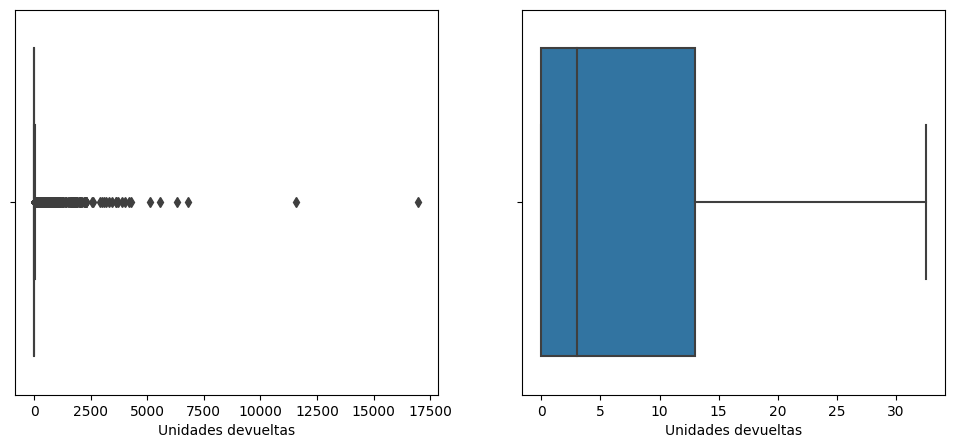

In [ ]:
var_df = df["Unidades_Devueltas"]
x_label = "Unidades devueltas"
fig =  plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
before = sns.boxplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.boxplot(x = clipped_ud, ax = ax1)
after.set_xlabel(x_label)


Text(0.5, 0, 'Unidades devueltas')

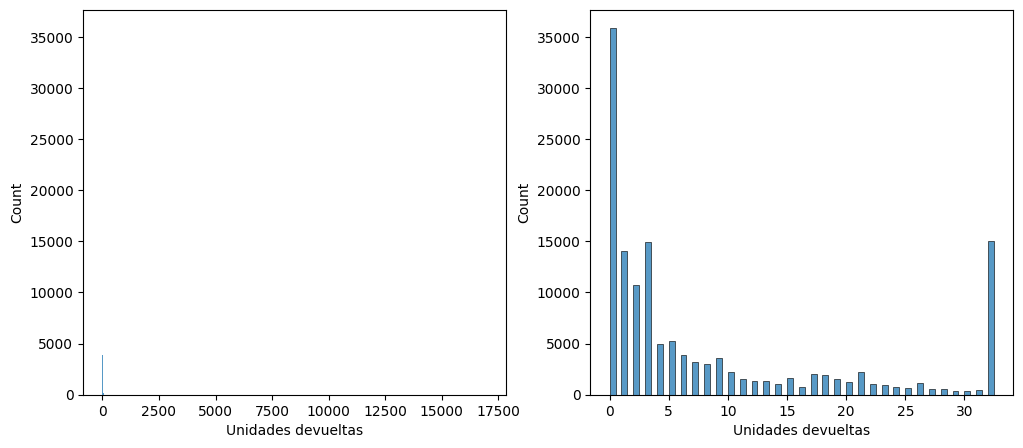

In [ ]:
fig = plt.figure(figsize=(12,5) )
ax = fig.add_subplot(1,2,1)
before = sns.histplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.histplot(x = clipped_ud, ax = ax1)
after.set_xlabel(x_label)

In [ ]:
# Asignamos al dataset la serie que se obtuvo de método de clipped.
df["Unidades_Devueltas"] = clipped_ud

#### Variable *Monto_Devolucion*

In [ ]:
clipped_md = clip_features(df["Monto_Devolucion"], 1.5, True, True)

Text(0.5, 0, 'Monto devuelto')

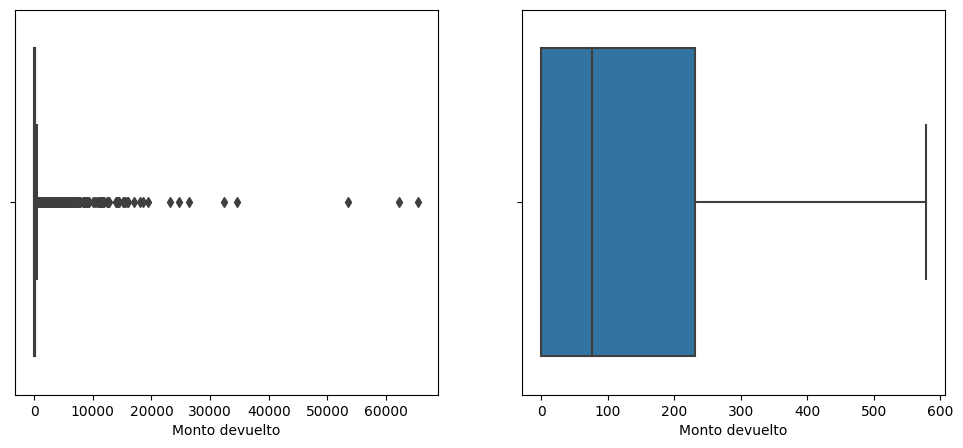

In [ ]:
var_df = df["Monto_Devolucion"]
fig =  plt.figure(figsize=(12,5))
x_label = "Monto devuelto"
ax = fig.add_subplot(1,2,1)
before = sns.boxplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.boxplot(x = clipped_md, ax = ax1)
after.set_xlabel(x_label)

Text(0.5, 0, 'Monto devuelto')

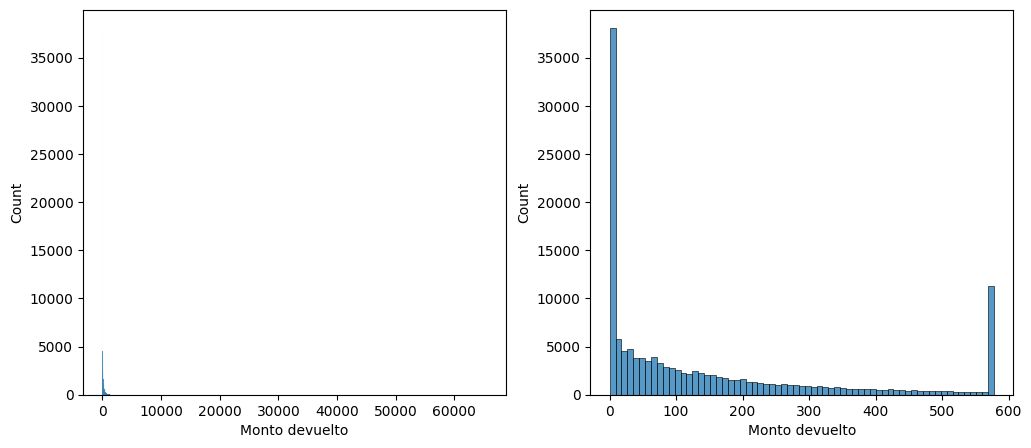

In [ ]:
fig = plt.figure(figsize=(12,5) )
ax = fig.add_subplot(1,2,1)
before = sns.histplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.histplot(x = clipped_md, ax = ax1)
after.set_xlabel(x_label)

In [ ]:
# Asignamos al dataset la serie que se obtuvo de método de clipped.
df["Monto_Devolucion"] = clipped_md

#### Variable *Monto_Descuento*

In [ ]:
clipped_mdes = clip_features(df["Monto_Descuento"], 1.5, True, True)

Text(0.5, 0, 'Monto descuento')

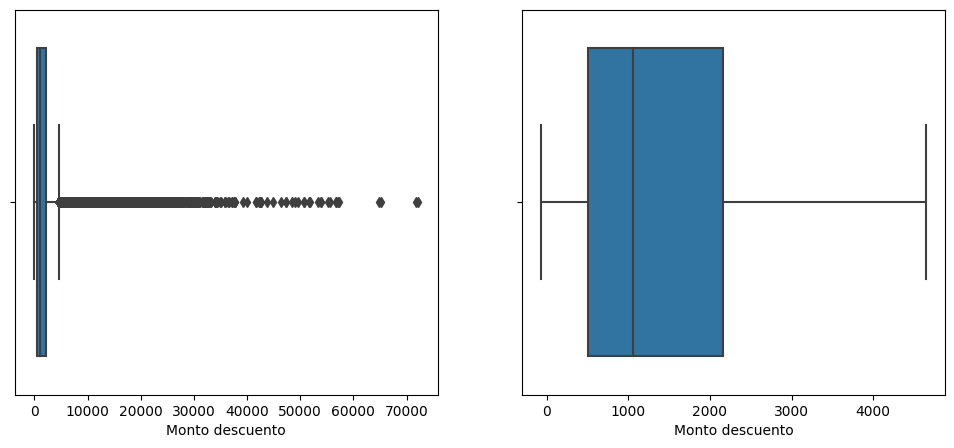

In [ ]:
var_df = df["Monto_Descuento"]
fig =  plt.figure(figsize=(12,5))
x_label = "Monto descuento"
ax = fig.add_subplot(1,2,1)
before = sns.boxplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.boxplot(x = clipped_mdes, ax = ax1)
after.set_xlabel(x_label)

Text(0.5, 0, 'Monto descuento')

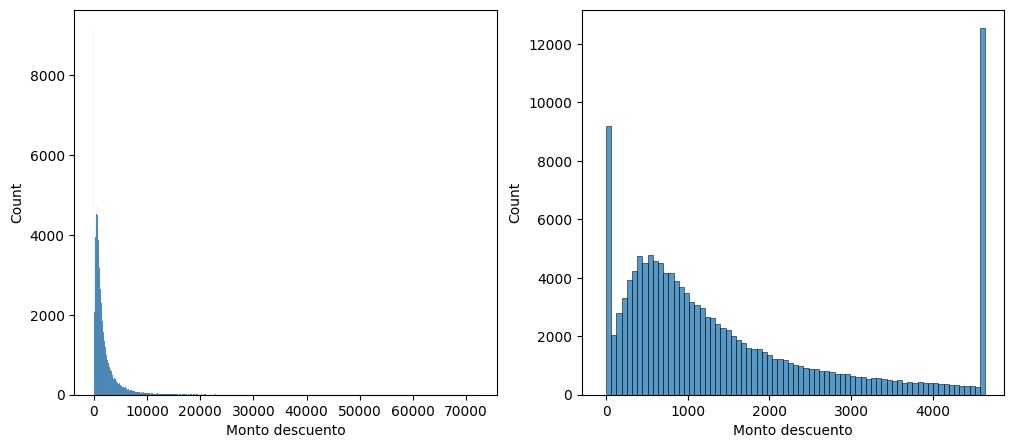

In [ ]:
fig = plt.figure(figsize=(12,5) )
ax = fig.add_subplot(1,2,1)
before = sns.histplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.histplot(x = clipped_mdes, ax = ax1)
after.set_xlabel(x_label)

In [ ]:
# Asignamos al dataset la serie que se obtuvo de método de clipped.
df["Monto_Descuento"] = clipped_mdes

#### Variable *Unidades_Venta_Neta*

In [ ]:
clipped_uvn = clip_features(df["Unidades_Venta_Neta"], 1.5, True, True)

Text(0.5, 0, 'Unidades de venta neta')

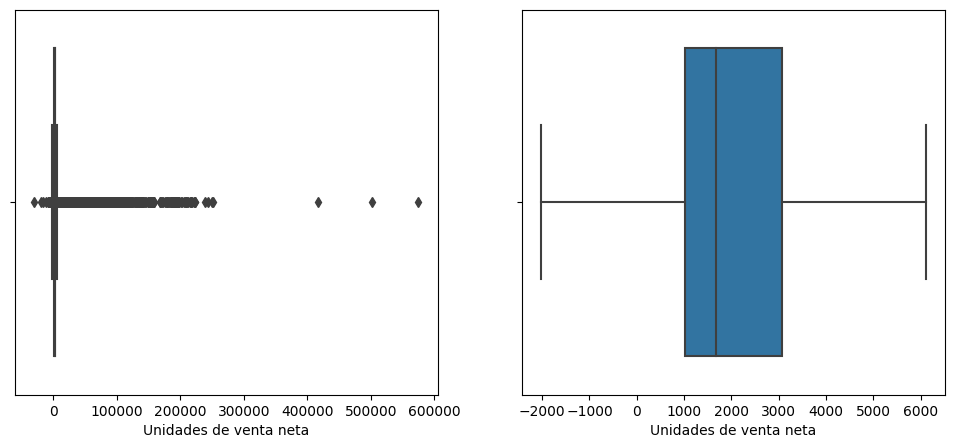

In [ ]:
var_df = df["Unidades_Venta_Neta"]
fig =  plt.figure(figsize=(12,5))
x_label = "Unidades de venta neta"
ax = fig.add_subplot(1,2,1)
before = sns.boxplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.boxplot(x = clipped_uvn, ax = ax1)
after.set_xlabel(x_label)

Text(0.5, 0, 'Unidades de venta neta')

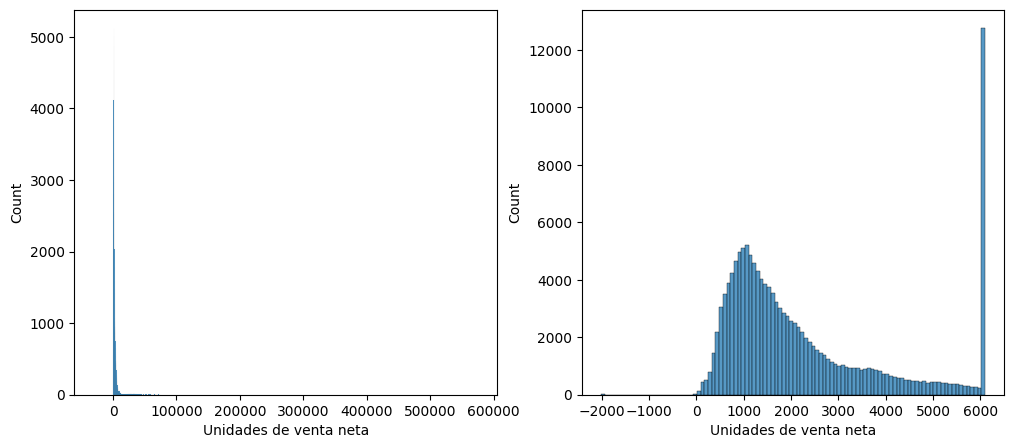

In [ ]:
fig = plt.figure(figsize=(12,5) )
ax = fig.add_subplot(1,2,1)
before = sns.histplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.histplot(x = clipped_uvn, ax = ax1)
after.set_xlabel(x_label)

In [ ]:
# Asignamos al dataset la serie que se obtuvo de método de clipped.
df["Unidades_Venta_Neta"] = clipped_uvn

#### Variable *Monto_Venta_Neta*

In [ ]:
clipped_mvn = clip_features(df["Monto_Venta_Neta"], 1.5, True, True)

Text(0.5, 0, 'Monto de venta neta')

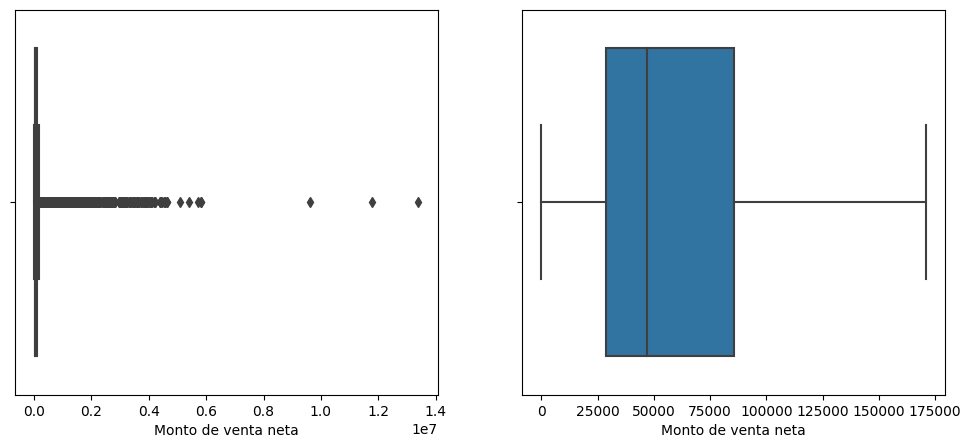

In [ ]:
var_df = df["Monto_Venta_Neta"]
fig =  plt.figure(figsize=(12,5))
x_label = "Monto de venta neta"
ax = fig.add_subplot(1,2,1)
before = sns.boxplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.boxplot(x = clipped_mvn, ax = ax1)
after.set_xlabel(x_label)

Text(0.5, 0, 'Monto de venta neta')

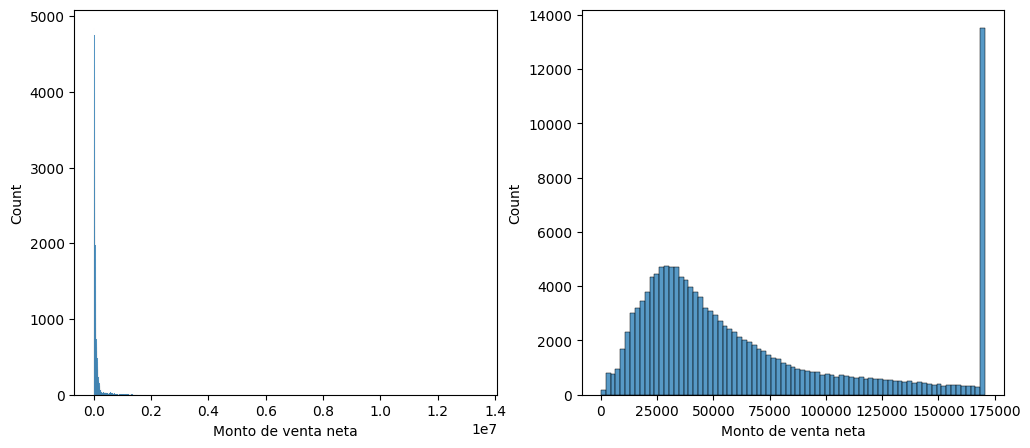

In [ ]:
fig = plt.figure(figsize=(12,5) )
ax = fig.add_subplot(1,2,1)
before = sns.histplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.histplot(x = clipped_mvn, ax = ax1)
after.set_xlabel(x_label)

In [ ]:
# Asignamos al dataset la serie que se obtuvo de método de clipped.
df["Monto_Venta_Neta"] = clipped_mvn

#### Variable *Monto_Costo_Venta*

In [ ]:
clipped_mcv = clip_features(df["Monto_Costo_Venta"], 1.5, True, True)

Text(0.5, 0, 'Monto de costo venta')

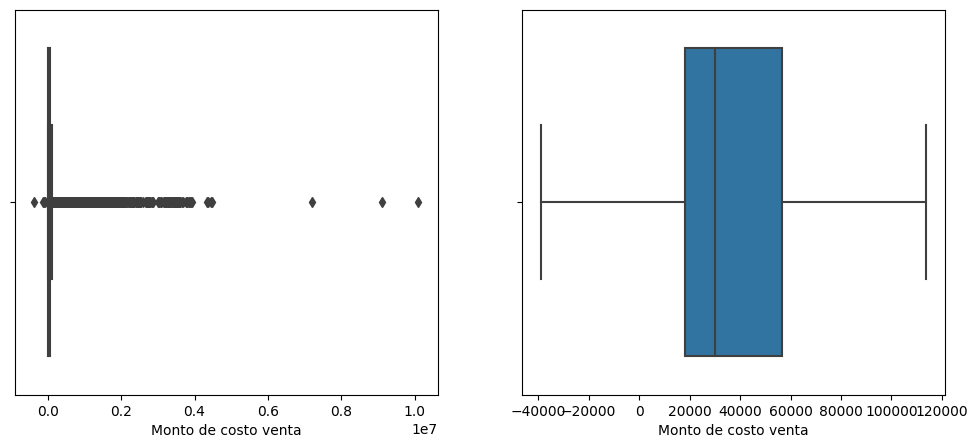

In [ ]:
var_df = df["Monto_Costo_Venta"]
fig =  plt.figure(figsize=(12,5))
x_label = "Monto de costo venta"
ax = fig.add_subplot(1,2,1)
before = sns.boxplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.boxplot(x = clipped_mcv, ax = ax1)
after.set_xlabel(x_label)

Text(0.5, 0, 'Monto de costo venta')

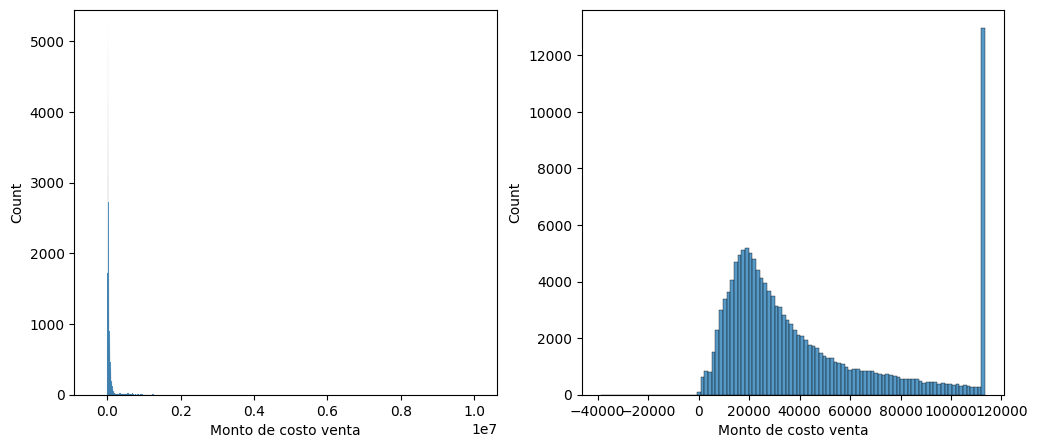

In [ ]:
fig = plt.figure(figsize=(12,5) )
ax = fig.add_subplot(1,2,1)
before = sns.histplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.histplot(x = clipped_mcv, ax = ax1)
after.set_xlabel(x_label)

In [ ]:
# Asignamos al dataset la serie que se obtuvo de método de clipped.
df["Monto_Costo_Venta"] = clipped_mcv

#### Variable *Monto_Margen_Venta*

In [ ]:
clipped_mmv = clip_features(df["Monto_Margen_Venta"], 1.5, True, True)

Text(0.5, 0, 'Monto margen de venta')

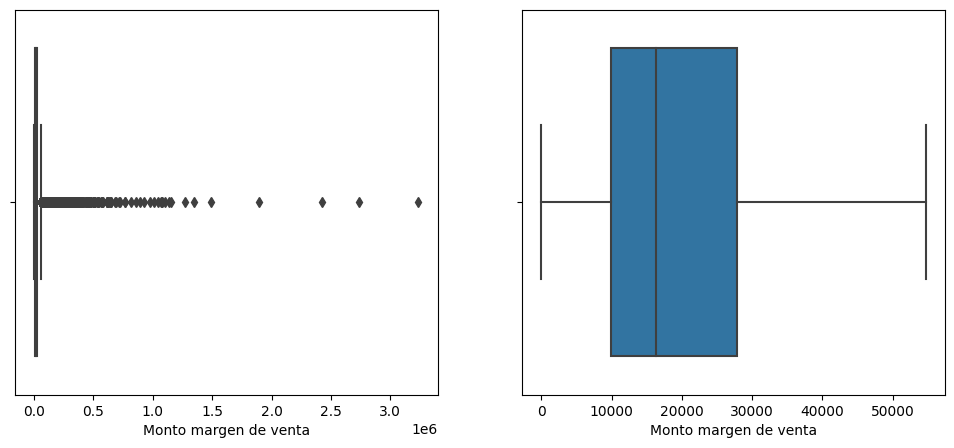

In [ ]:
var_df = df["Monto_Margen_Venta"]
fig =  plt.figure(figsize=(12,5))
x_label = "Monto margen de venta"
ax = fig.add_subplot(1,2,1)
before = sns.boxplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.boxplot(x = clipped_mmv, ax = ax1)
after.set_xlabel(x_label)

Text(0.5, 0, 'Monto margen de venta')

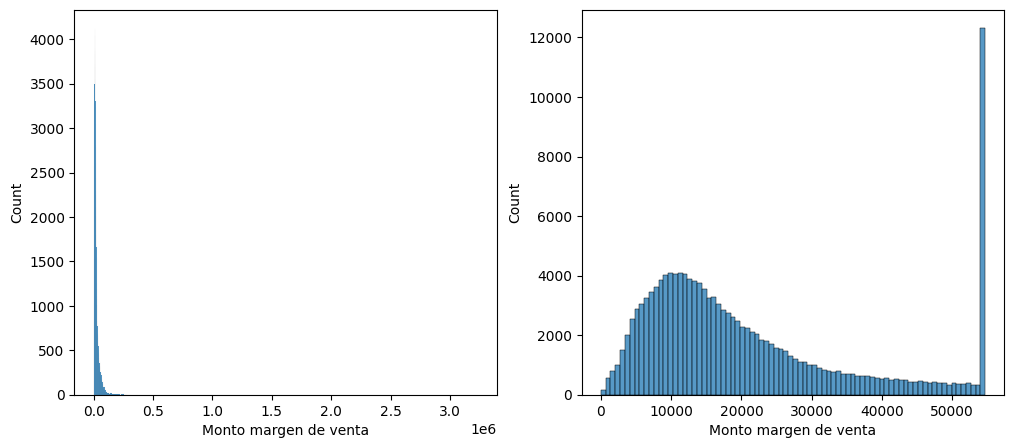

In [ ]:
fig = plt.figure(figsize=(12,5) )
ax = fig.add_subplot(1,2,1)
before = sns.histplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.histplot(x = clipped_mmv, ax = ax1)
after.set_xlabel(x_label)

In [ ]:
# Asignamos al dataset la serie que se obtuvo de método de clipped.
df["Monto_Margen_Venta"] = clipped_mmv

#### Variable *Porcentaje_Margen*
> Esta es la variable dependiente Y

In [ ]:
clipped_pm = clip_features(df["Porcentaje_Margen"], 1.5, True, True)

Text(0.5, 0, 'Porcentaje margen')

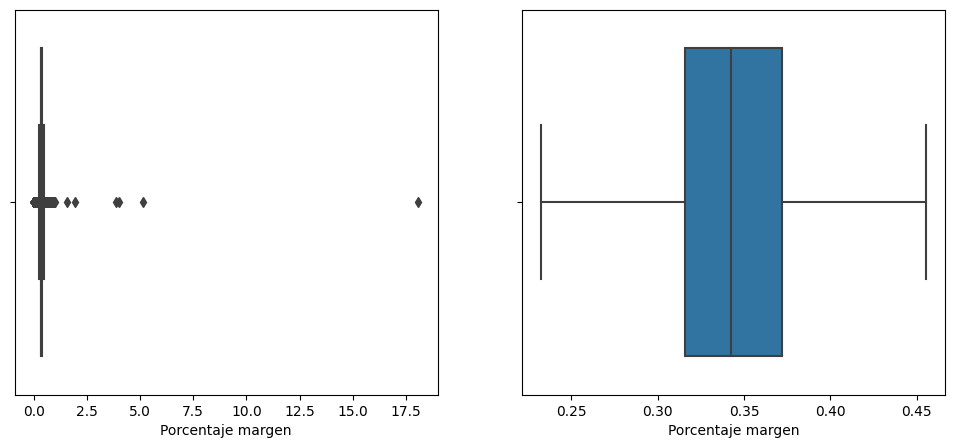

In [ ]:

var_df = df["Porcentaje_Margen"]
fig =  plt.figure(figsize=(12,5))
x_label = "Porcentaje margen"
ax = fig.add_subplot(1,2,1)
before = sns.boxplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.boxplot(x = clipped_pm, ax = ax1)
after.set_xlabel(x_label)

Text(0.5, 0, 'Porcentaje margen')

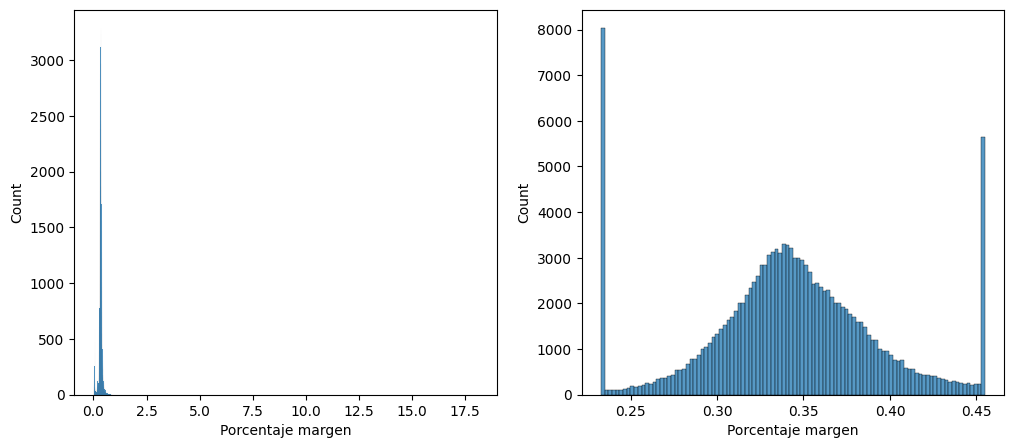

In [ ]:
fig = plt.figure(figsize=(12,5) )
ax = fig.add_subplot(1,2,1)
before = sns.histplot(x = var_df, ax = ax)
before.set_xlabel(x_label)
ax1 = fig.add_subplot(1,2,2)
after = sns.histplot(x = clipped_pm, ax = ax1)
after.set_xlabel(x_label)


In [ ]:
# Asignamos al dataset la serie que se obtuvo de método de clipped.
# df["Porcentaje_Margen"] = clipped_pm

#### Variable *Comercios_por_10000*

In [ ]:
df["Comercios_por_10000"].head()

Id_Tienda
227    70.38
227    70.38
227    70.38
227    70.38
227    70.38
Name: Comercios_por_10000, dtype: float64

#### Variable *%_Ocupacion_12_o_mas*

In [ ]:
df["%_Ocupacion_12_o_mas"].head()

Id_Tienda
227    0.4484
227    0.4484
227    0.4484
227    0.4484
227    0.4484
Name: %_Ocupacion_12_o_mas, dtype: float64

#### Variable *%_Falta_acceso_alimentacion*

In [ ]:
df["%_Falta_acceso_alimentacion"].head()

Id_Tienda
227    0.089957
227    0.089957
227    0.089957
227    0.089957
227    0.089957
Name: %_Falta_acceso_alimentacion, dtype: float64

## Normalizar a 0 - 1

In [ ]:
columns_names = df.columns.values
columns_names

array(['Unidades_Devueltas', 'Monto_Devolucion', 'Monto_Descuento',
       'Unidades_Venta_Neta', 'Monto_Venta_Neta', 'Monto_Costo_Venta',
       'Monto_Margen_Venta', 'Porcentaje_Margen', 'Descripcion_Tienda',
       'Id_Zona_Geografica', 'Id_Formato_Tienda', 'Num_PisoVentaM2',
       'Id_Ciudad', 'Id_Tipo_Calle', 'CP', 'Asentamiento',
       'Comercios_por_10000', '%_Ocupacion_12_o_mas',
       '%_Falta_acceso_alimentacion'], dtype=object)

In [ ]:
df_a_escalar = df[["Unidades_Devueltas", "Monto_Devolucion", "Monto_Descuento", "Unidades_Venta_Neta", "Monto_Venta_Neta", "Monto_Costo_Venta","Monto_Margen_Venta", "Comercios_por_10000"]]

In [ ]:
df_escalas = escalar_a_01(df_a_escalar)
df_escalas

,Unidades_Devueltas,Monto_Devolucion,Monto_Descuento,Unidades_Venta_Neta,Monto_Venta_Neta,Monto_Costo_Venta,Monto_Margen_Venta,Comercios_por_10000
Id_Tienda,,,,,,,,
227,0.400000,0.580536,0.545362,0.505542,0.352619,0.509069,0.391991,0.581693
227,0.000000,0.000000,0.501554,0.676601,0.540315,0.619964,0.669312,0.581693
227,0.000000,0.000000,0.331554,0.530049,0.336282,0.479331,0.423771,0.581693
227,0.030769,0.065908,0.216856,0.426724,0.228518,0.412941,0.272121,0.581693
227,0.030769,0.059390,0.190635,0.401601,0.180596,0.380742,0.212133,0.581693
...,...,...,...,...,...,...,...,...
288,0.000000,0.000000,0.076982,0.615271,0.197951,0.389342,0.242380,0.675754
288,0.000000,0.000000,0.115971,0.438916,0.192143,0.385772,0.234185,0.675754
288,0.000000,0.000000,0.102519,0.518473,0.217841,0.404686,0.261764,0.675754


In [ ]:
for var in df.columns.values:
    if var in df_escalas.columns.values:
      continue
    df_escalas[var] = df[var]

In [ ]:
df_escalas.head()

,Unidades_Devueltas,Monto_Devolucion,Monto_Descuento,Unidades_Venta_Neta,Monto_Venta_Neta,Monto_Costo_Venta,Monto_Margen_Venta,Comercios_por_10000,Porcentaje_Margen,Descripcion_Tienda,Id_Zona_Geografica,Id_Formato_Tienda,Num_PisoVentaM2,Id_Ciudad,Id_Tipo_Calle,CP,Asentamiento,%_Ocupacion_12_o_mas,%_Falta_acceso_alimentacion
Id_Tienda,,,,,,,,,,,,,,,,,,,
227,0.400000,0.580536,0.545362,0.505542,0.352619,0.509069,0.391991,0.581693,0.356030,189,200,105,169,104,5,32800,15,0.4484,0.089957
227,0.000000,0.000000,0.501554,0.676601,0.540315,0.619964,0.669312,0.581693,0.396733,189,200,105,169,104,5,32800,15,0.4484,0.089957
227,0.000000,0.000000,0.331554,0.530049,0.336282,0.479331,0.423771,0.581693,0.403593,189,200,105,169,104,5,32800,15,0.4484,0.089957
227,0.030769,0.065908,0.216856,0.426724,0.228518,0.412941,0.272121,0.581693,0.381379,189,200,105,169,104,5,32800,15,0.4484,0.089957
227,0.030769,0.059390,0.190635,0.401601,0.180596,0.380742,0.212133,0.581693,0.376197,189,200,105,169,104,5,32800,15,0.4484,0.089957


## One Hot Data

In [ ]:
list_to_dummies = ['Descripcion_Tienda', 'Id_Zona_Geografica', 'Id_Formato_Tienda', 'Num_PisoVentaM2', 'Id_Ciudad', 'Id_Tipo_Calle', 'CP', 'Asentamiento']
df_one_hot = df.drop(columns=list_to_dummies)
df_one_hot.head()

,Unidades_Devueltas,Monto_Devolucion,Monto_Descuento,Unidades_Venta_Neta,Monto_Venta_Neta,Monto_Costo_Venta,Monto_Margen_Venta,Porcentaje_Margen,Comercios_por_10000,%_Ocupacion_12_o_mas,%_Falta_acceso_alimentacion
Id_Tienda,,,,,,,,,,,
227,13.0,335.581218,2503.056998,2088.0,60223.2535,38781.96635,21441.28715,0.356030,70.38,0.4484,0.089957
227,0.0,0.000000,2296.849486,3477.0,92279.0535,55668.88236,36610.17114,0.396733,70.38,0.4484,0.089957
227,0.0,0.000000,1496.648722,2287.0,57433.1035,34253.51394,23179.58956,0.403593,70.38,0.4484,0.089957
227,1.0,38.098550,956.751624,1448.0,39028.4135,24143.79344,14884.62006,0.381379,70.38,0.4484,0.089957
227,1.0,34.330814,833.328276,1244.0,30844.0935,19240.64886,11603.44464,0.376197,70.38,0.4484,0.089957


In [ ]:
res = one_hot(df[list_to_dummies])
df_one_hot = pd.concat([df_one_hot, res], axis=1)

In [ ]:
df_one_hot.head()

,Unidades_Devueltas,Monto_Devolucion,Monto_Descuento,Unidades_Venta_Neta,Monto_Venta_Neta,Monto_Costo_Venta,Monto_Margen_Venta,Porcentaje_Margen,Comercios_por_10000,%_Ocupacion_12_o_mas,...,Asentamiento_149,Asentamiento_150,Asentamiento_151,Asentamiento_152,Asentamiento_153,Asentamiento_154,Asentamiento_155,Asentamiento_156,Asentamiento_157,Asentamiento_158
Id_Tienda,,,,,,,,,,,,,,,,,,,,,
227,13.0,335.581218,2503.056998,2088.0,60223.2535,38781.96635,21441.28715,0.356030,70.38,0.4484,...,0,0,0,0,0,0,0,0,0,0
227,0.0,0.000000,2296.849486,3477.0,92279.0535,55668.88236,36610.17114,0.396733,70.38,0.4484,...,0,0,0,0,0,0,0,0,0,0
227,0.0,0.000000,1496.648722,2287.0,57433.1035,34253.51394,23179.58956,0.403593,70.38,0.4484,...,0,0,0,0,0,0,0,0,0,0
227,1.0,38.098550,956.751624,1448.0,39028.4135,24143.79344,14884.62006,0.381379,70.38,0.4484,...,0,0,0,0,0,0,0,0,0,0
227,1.0,34.330814,833.328276,1244.0,30844.0935,19240.64886,11603.44464,0.376197,70.38,0.4484,...,0,0,0,0,0,0,0,0,0,0


# Redes Neuronales

### Prueba con solo clipped

#### Asignamos nuestras variables X e y;

In [ ]:
X = df.drop(columns=["Porcentaje_Margen"]);
y = df["Porcentaje_Margen"]

#### Creamos nuestros datasets de prueba y de entrenamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X.shape[1]

18

In [ ]:
l0 = tf.keras.layers.Dense(units=16, input_shape=([X.shape[1]]), activation="relu")
l1 = tf.keras.layers.Dense(units=8, activation="relu")
l2 = tf.keras.layers.Dense(units=1)

In [ ]:
model = tf.keras.Sequential([l0, l1, l2])

In [ ]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:

history = model.fit(X_train, y_train, epochs=60, batch_size=32, verbose=True, validation_split=0.1)

c:\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/60
2756/2756 [==============================] - 10s 3ms/step - loss: 1176297.3750 - val_loss: 12238.2832
Epoch 2/60
2756/2756 [==============================] - 7s 3ms/step - loss: 4850.2388 - val_loss: 5379.5708
Epoch 3/60
2756/2756 [==============================] - 8s 3ms/step - loss: 3663.2063 - val_loss: 2119.1482
Epoch 4/60
2756/2756 [==============================] - 7s 3ms/step - loss: 2357.1672 - val_loss: 764.7194
Epoch 5/60
2756/2756 [==============================] - 7s 3ms/step - loss: 293.3314 - val_loss: 29.9862
Epoch 6/60
2756/2756 [==============================] - 7s 3ms/step - loss: 24.3997 - val_loss: 11.5435
Epoch 7/60
2756/2756 [==============================] - 7s 3ms/step - loss: 8.8010 - val_loss: 13.0670
Epoch 8/60
2756/2756 [==============================] - 7s 3ms/step - loss: 5.6072 - val_loss: 0.6955
Epoch 9/60
2756/2756 [==============================] - 7s 3ms/step - loss: 13.1087 - val_loss: 5.5766
Epoch 10/60
2756/2756 [========================

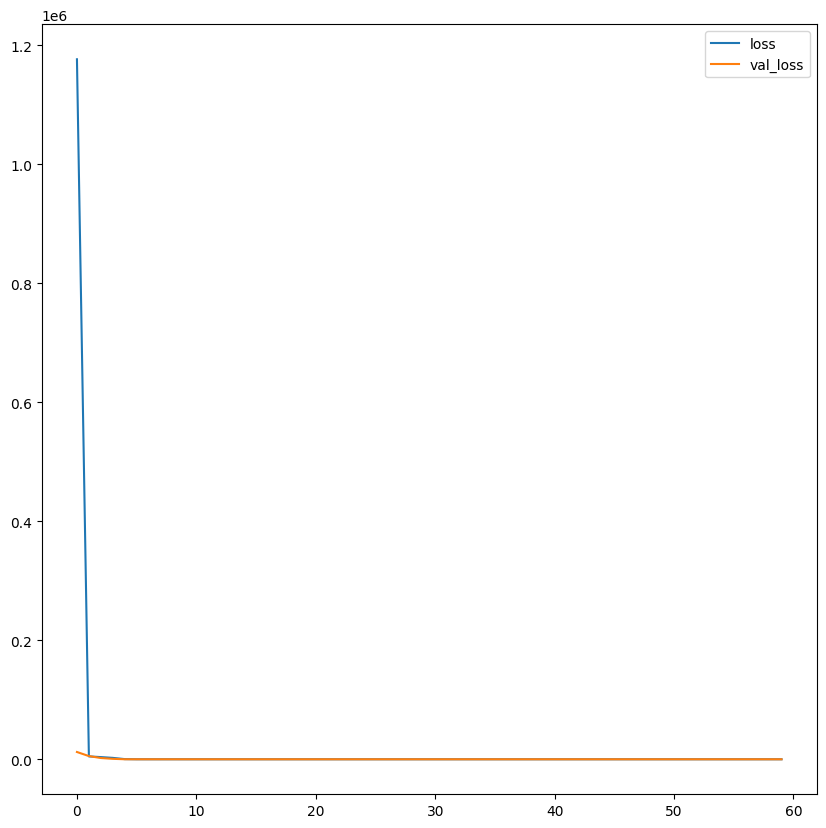

In [ ]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
y_pred = model.predict(X_test)

1313/1313 [==============================] - 3s 2ms/step


In [ ]:
r2_score(y_test, y_pred)

-0.0006764511196049039

In [ ]:
# tf.keras.backend.clear_session()

### Prueba con clipped y escalando a 0 - 1

#### Asignamos nuestras variables X_ce e y_ce;

In [ ]:
X_ce = df_escalas.drop(columns=["Porcentaje_Margen"]);
y_ce = df_escalas["Porcentaje_Margen"]

#### Creamos nuestros datasets de prueba y de entrenamiento

In [ ]:
X_train_ce, X_test_ce, y_train_ce, y_test_ce = train_test_split(X_ce, y_ce, test_size=0.3)

In [ ]:
l0_ce = tf.keras.layers.Dense(units=16, input_shape=([X_ce.shape[1]]), activation="relu")
l1_ce = tf.keras.layers.Dense(units=8, activation="relu")
l2_ce = tf.keras.layers.Dense(units=1)

In [ ]:
model_ce = tf.keras.Sequential([l0_ce, l1_ce, l2_ce])

In [ ]:
model_ce.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
history_ce = model_ce.fit(X_train_ce, y_train_ce, epochs=60, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/60


c:\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


2756/2756 [==============================] - 9s 3ms/step - loss: 1091.0732 - val_loss: 0.5965
Epoch 2/60
2756/2756 [==============================] - 7s 3ms/step - loss: 0.3360 - val_loss: 0.1818
Epoch 3/60
2756/2756 [==============================] - 7s 3ms/step - loss: 0.7050 - val_loss: 0.1068
Epoch 4/60
2756/2756 [==============================] - 7s 3ms/step - loss: 1.7026 - val_loss: 1.5581
Epoch 5/60
2756/2756 [==============================] - 7s 3ms/step - loss: 1.6486 - val_loss: 0.6003
Epoch 6/60
2756/2756 [==============================] - 7s 3ms/step - loss: 1.6521 - val_loss: 0.2735
Epoch 7/60
2756/2756 [==============================] - 7s 3ms/step - loss: 1.5485 - val_loss: 0.0380
Epoch 8/60
2756/2756 [==============================] - 7s 3ms/step - loss: 1.5698 - val_loss: 0.0189
Epoch 9/60
2756/2756 [==============================] - 7s 3ms/step - loss: 1.4657 - val_loss: 0.6722
Epoch 10/60
2756/2756 [==============================] - 7s 3ms/step - loss: 1.4425 - val_

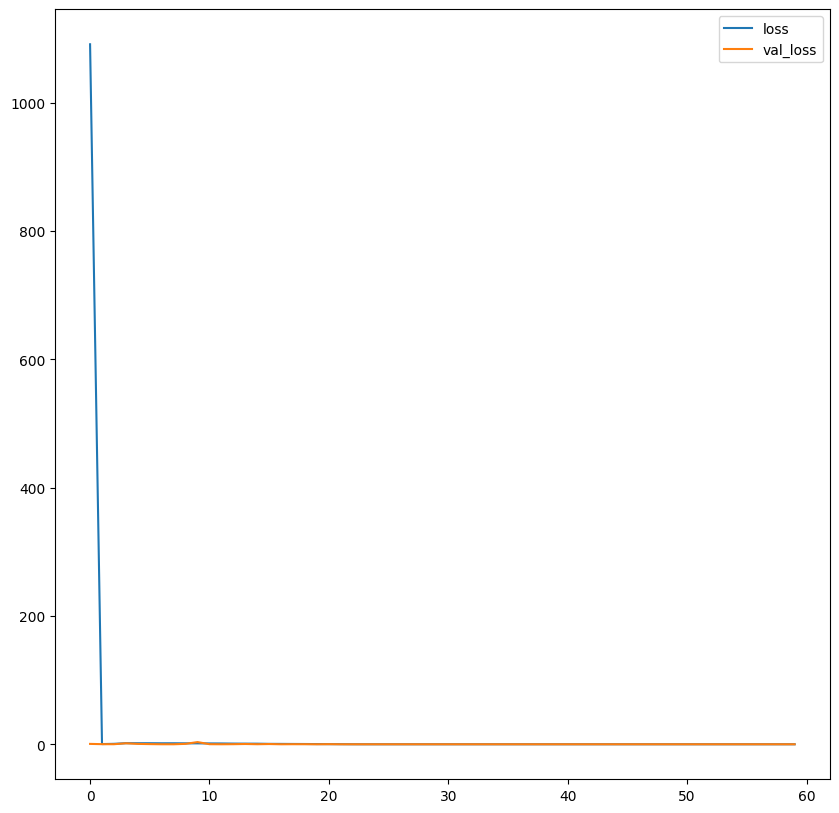

In [ ]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history_ce.history["loss"], label="loss")
plt.plot(history_ce.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
y_pred_ce = model_ce.predict(X_test_ce)

1313/1313 [==============================] - 3s 2ms/step


In [ ]:
r2_score(y_test_ce, y_pred_ce)

-0.00042051057697078953

### Prueba con clipped, escalando a 0 - 1 y One Hot

In [ ]:
X_ceo = df_one_hot.drop(columns=["Porcentaje_Margen"]);
y_ceo = df_one_hot["Porcentaje_Margen"]

In [ ]:
X_train_ceo, X_test_ceo, y_train_ceo, y_test_ceo = train_test_split(X_ceo, y_ceo, test_size=0.3)

In [ ]:
X_ceo.shape[1]

740

In [ ]:
l0_ceo = tf.keras.layers.Dense(units=512, input_shape=([X_ceo.shape[1]]), activation="relu")
l1_ceo = tf.keras.layers.Dense(units=256, activation="relu")
l2_ceo = tf.keras.layers.Dense(units=1)

In [ ]:
model_ceo = tf.keras.Sequential([l0_ceo, l1_ceo, l2_ceo])

In [ ]:
model_ceo.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
history_ceo = model_ceo.fit(X_train_ceo, y_train_ceo, epochs=60, batch_size=32, verbose=True, validation_split=0.1)

c:\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/60
2756/2756 [==============================] - 52s 18ms/step - loss: 82197.7422 - val_loss: 100.1944
Epoch 2/60
2756/2756 [==============================] - 47s 17ms/step - loss: 4761.5864 - val_loss: 8.1645
Epoch 3/60
2756/2756 [==============================] - 48s 17ms/step - loss: 1048.0646 - val_loss: 3918.6606
Epoch 4/60
2756/2756 [==============================] - 48s 18ms/step - loss: 372.8572 - val_loss: 46.6610
Epoch 5/60
2756/2756 [==============================] - 47s 17ms/step - loss: 100.1699 - val_loss: 8.0659
Epoch 6/60
2756/2756 [==============================] - 48s 17ms/step - loss: 28.6021 - val_loss: 0.7170
Epoch 7/60
2756/2756 [==============================] - 47s 17ms/step - loss: 3.0325 - val_loss: 0.0288
Epoch 8/60
2756/2756 [==============================] - 47s 17ms/step - loss: 0.8206 - val_loss: 0.0077
Epoch 9/60
2756/2756 [==============================] - 48s 17ms/step - loss: 4.4627 - val_loss: 0.0066
Epoch 10/60
2756/2756 [====================

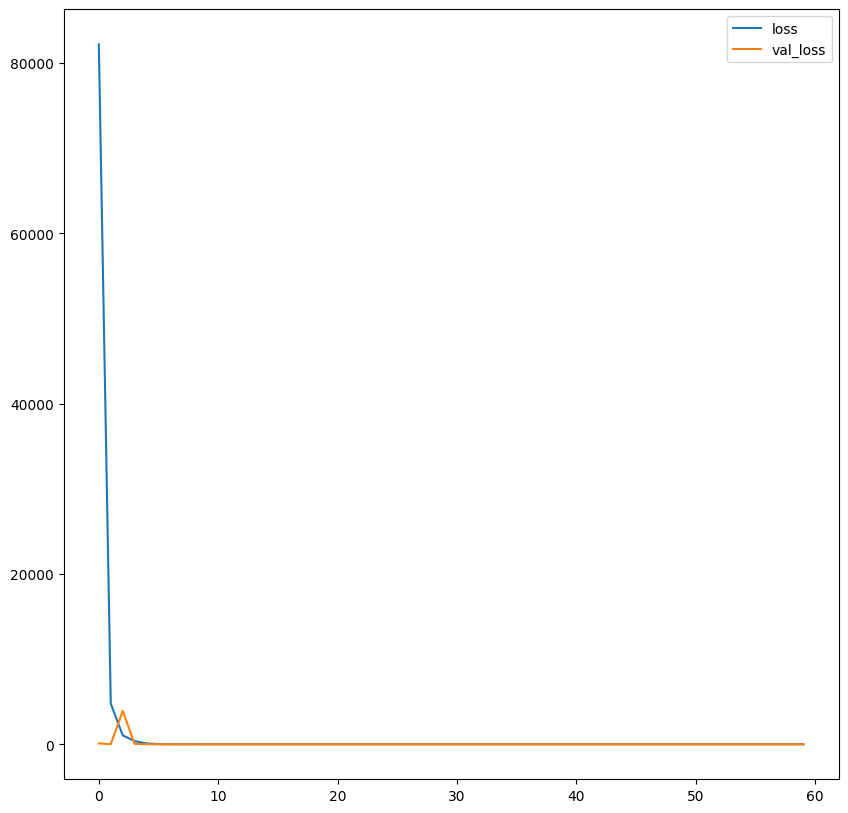

In [ ]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history_ceo.history["loss"], label="loss")
plt.plot(history_ceo.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
y_pred_ceo = model_ceo.predict(X_test_ceo)

1313/1313 [==============================] - 10s 7ms/step


In [ ]:
r2_score(y_test_ceo, y_pred_ceo)

-2.0095700692450436

In [ ]:
# Limpiar modelos

# tf.keras.backend.clear_session()

### Comentarios
Como podemos observan en los resultados al realizar diferentes pruebas con diferentes tratamientos de los datos, no son lo suficientemente buenos, con el método de redes, para hacer predicciones. Ya que como podemos ver con ayuda de la gráfica y el resultado de r_square. este modelo puede estar teniendo underfitting, por falta de datos para poder obtener mejores resultados.

# Naive bayes

## GaussianNB

In [ ]:
X_nb = df.drop(columns=["Porcentaje_Margen"]);

In [ ]:
# Convirtiendo la variable numérica a categórica en 2 bins
# 0 = bajo
# 1 = alto
y_nb = pd.cut(x=df['Porcentaje_Margen'], bins=2, labels=[0, 1])
y_nb.unique()

[0, 1]
Categories (2, int64): [0 < 1]

In [ ]:
# Dado que en el método de gauss es necesario que las variables de X sean continuas, retiramos las variables que sean categóricas.
X_nb = X_nb.drop(columns=list_to_dummies)

In [ ]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.3)

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_nb, y_train_nb)
y_pred_nb = gaussian_nb.predict(X_test_nb)

In [ ]:
evaluar_modelo(y_test_nb, y_pred_nb)

Exactitud: 100.0
Sensibilidad: Cat'n divide by 0
Especificidad: 100.0


## CategoricalNB

In [ ]:
# Para este tipo de modelo CategoricalNB las variables deben ser categóricas por esto obtenemos nuestras variables de este tipo
X_nb_cat = df[list_to_dummies]
y_nb_cat = y_nb

In [ ]:
X_train_nb_cat, X_test_nb_cat, y_train_nb_cat, y_test_nb_cat = train_test_split(X_nb_cat, y_nb_cat, test_size=0.3)

In [ ]:
catNb = CategoricalNB(force_alpha = True)

In [ ]:
catNb.fit(X_train_nb_cat, y_train_nb_cat)

CategoricalNB(force_alpha=True)

In [ ]:
y_pred_nb_cat = catNb.predict(X_test_nb_cat)

In [ ]:
evaluar_modelo(y_test_nb_cat, y_pred_nb_cat)

Exactitud: 100.0
Sensibilidad: Cat'n divide by 0
Especificidad: 100.0


### Comentarios
En este método se evaluaron dos tipos GaussianNB para las variables continuas y CategoricalNB para las categóricas, como se ve en ambos casos, estas se quedaron con resultados similares, en ambas se puede obtener buenos resultados en cuanto a Exactitud y Especificidad, pero es imposible calcular la sensibilidad por lo que el modelo no tiene buena respuesta en la diferenciación de los datos
> Resultados de GaussianNB
* Exactitud: 100.0
* Sensibilidad: Cat'n divide by 0
* Especificidad: 100.0

> Resultados de CategiricalNB
* Exactitud: 100.0
* Sensibilidad: Cat'n divide by 0
* Especificidad: 100.0
